# Description (From the Project Problem Statement)

## Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective
To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.

## Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?



# 1. Loading Libraries and Importing Data

In [1]:
%load_ext nb_black
%matplotlib inline

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# Libraries to build logistic regression model
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune models
from sklearn.model_selection import GridSearchCV

# To get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
# To import the data and make a copy to avoid corrupting the data
LoanMod = pd.read_csv("Loan_Modelling.csv")
data = LoanMod.copy()

<IPython.core.display.Javascript object>

# 2. Data Preprocessing and EDA

In [3]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 5000 rows and 14 columns.


<IPython.core.display.Javascript object>

In [4]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [5]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

In [6]:
# using random state to return the same sample set in future use this also allows a larger sample to pick out any anomalies
data.sample(50, random_state=2)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3566,3567,57,33,80,92064,2,2.80,1,0,0,0,0,1,1
4252,4253,54,29,81,91107,1,0.10,3,0,0,0,0,0,0
1918,1919,39,9,118,93555,2,6.00,3,246,1,0,1,1,1
4111,4112,43,17,21,95351,3,1.50,1,0,0,0,0,0,0
1471,1472,52,26,180,94305,1,1.00,1,0,0,0,0,1,1
929,930,55,30,22,92121,1,1.50,2,91,0,0,0,0,1
1916,1917,57,32,64,95138,3,1.60,3,0,0,0,0,1,0
3995,3996,53,28,34,92697,2,0.60,3,0,0,0,0,1,1
1130,1131,58,32,191,94402,1,2.90,1,0,0,0,0,0,0
1723,1724,39,15,55,95821,1,1.50,3,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

In [8]:
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<IPython.core.display.Javascript object>

### * `Personal_Loan` is going to be my target variable.
### * The `ID` column is duplicating the index so it can be dropped.
### * The `ZIPCode` column will have to be modified into a more useful format.
### * There are -n values in `Experience` that will have to be dealt with.
### * `Mortgage` is heavily skewed. Renters would throw these numbers off. I will treat this as yes /no variable.
### * All columns are currently numerical as either int64 or in the case of `CCAvg` float64

In [9]:
# Checking the math behind the 9% success rate
data["Personal_Loan"].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

<IPython.core.display.Javascript object>

In [10]:
# Dropping ID column that will not be used.
data.drop(["ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [11]:
# Checking for duplicated rows.
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [12]:
# Verifying that there are no missing values
data.isnull().sum().sort_values(ascending=False)

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

### * There are no duplicates or missing values to deal with.

# 3. Data Processing

### * Getting rid of the negative values in the `Experience` column by using absolute values

In [13]:
# Changing the values in Experience to absolute values as the negative numbers seem like data entry mistakes.
data.iloc[:, 1] = data.iloc[:, 1].abs()

<IPython.core.display.Javascript object>

### * Using uszipcode to translate the zip codes into the county name that the zipcode is located in

In [14]:
# Importing uszipcode and using it to change the ZIPCode numbers into County Names

from uszipcode import SearchEngine, SimpleZipcode, Zipcode

search = SearchEngine(simple_zipcode=True)
zcode = data.ZIPCode

# print(zcode)

counties = []


def zcf(x):
    for i in x:
        zip_search = search.by_zipcode(i)
        county = zip_search.county
        counties.append(county)


zcf(zcode)
# print(counties)


#Adding a County column to the data and verification that the code works
data.insert(loc=4, column="County", value=counties, allow_duplicates=True)
data.sample(50, random_state=2)


,Age,Experience,Income,ZIPCode,County,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3566,57,33,80,92064,San Diego County,2,2.80,1,0,0,0,0,1,1
4252,54,29,81,91107,Los Angeles County,1,0.10,3,0,0,0,0,0,0
1918,39,9,118,93555,Kern County,2,6.00,3,246,1,0,1,1,1
4111,43,17,21,95351,Stanislaus County,3,1.50,1,0,0,0,0,0,0
1471,52,26,180,94305,Santa Clara County,1,1.00,1,0,0,0,0,1,1
929,55,30,22,92121,San Diego County,1,1.50,2,91,0,0,0,0,1
1916,57,32,64,95138,Santa Clara County,3,1.60,3,0,0,0,0,1,0
3995,53,28,34,92697,Orange County,2,0.60,3,0,0,0,0,1,1
1130,58,32,191,94402,San Mateo County,1,2.90,1,0,0,0,0,0,0
1723,39,15,55,95821,Sacramento County,1,1.50,3,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [15]:
data.drop(["ZIPCode"], axis=1, inplace=True)
data.head()  # quick check code worked

,Age,Experience,Income,County,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,Los Angeles County,4,1.6,1,0,0,1,0,0,0
1,45,19,34,Los Angeles County,3,1.5,1,0,0,1,0,0,0
2,39,15,11,Alameda County,1,1.0,1,0,0,0,0,0,0
3,35,9,100,San Francisco County,1,2.7,2,0,0,0,0,0,0
4,35,8,45,Los Angeles County,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [16]:
# Looking at the breakdown of Counties represented in the dataset.

print(data.County.value_counts())

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Kern County                 54
Marin County                54
San Luis Obispo County      33
Solano County               33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou County              7
Tuolumne

<IPython.core.display.Javascript object>

### * Taking a look at the modified dataset so far.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   County              4966 non-null   object 
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 507.9+ KB


<IPython.core.display.Javascript object>

### * There are now 34 missing values in the County column. I will verify and drop.

In [18]:
data.isnull().sum().sort_values(ascending=False)

County                34
Age                    0
Experience             0
Income                 0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal_Loan          0
Securities_Account     0
CD_Account             0
Online                 0
CreditCard             0
dtype: int64

<IPython.core.display.Javascript object>

In [19]:
# Dropping rows missing Counties
data.dropna(subset=["County"], inplace=True)

<IPython.core.display.Javascript object>

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4966 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4966 non-null   int64  
 1   Experience          4966 non-null   int64  
 2   Income              4966 non-null   int64  
 3   County              4966 non-null   object 
 4   Family              4966 non-null   int64  
 5   CCAvg               4966 non-null   float64
 6   Education           4966 non-null   int64  
 7   Mortgage            4966 non-null   int64  
 8   Personal_Loan       4966 non-null   int64  
 9   Securities_Account  4966 non-null   int64  
 10  CD_Account          4966 non-null   int64  
 11  Online              4966 non-null   int64  
 12  CreditCard          4966 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 543.2+ KB


<IPython.core.display.Javascript object>

### * Using one hot method to turn the counties into dummy variables

In [21]:
data1 = pd.get_dummies(data, columns=["County",], drop_first=True,)
data1.head()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County
0,25,1,49,4,1.6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [22]:
mort = data1.Mortgage

mortbool = []


def mb(x):
    for i in x:
        if i == 0:
            mortbool.append(0)
        else:
            mortbool.append(1)


mb(mort)

#print(mortbool)


# Adding a new column to the data and verification that the code works
data1.insert(loc=7, column="Mortgage_Rev1", value=mortbool, allow_duplicates=True)
data1.sample(50, random_state=2)


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Mortgage_Rev1,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County
1795,49,24,70,1,2.90,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4024,41,15,82,3,0.10,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3484,45,18,53,3,2.50,2,112,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201,35,9,20,2,1.40,3,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3492,35,9,28,1,0.60,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1496,36,12,18,1,0.50,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3366,33,9,152,1,6.00,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,26,0,30,4,1.30,3,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2181,45,15,32,1,0.75,3,105,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
122,58,32,73,2,0.70,2,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [23]:
data1.drop(["Mortgage"], axis=1, inplace=True)
data1.head()  # again to check the code is working as planned

,Age,Experience,Income,Family,CCAvg,Education,Mortgage_Rev1,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County
0,25,1,49,4,1.6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [24]:
# Checking if the outliersin Income are extreme enough to drop.
quartiles = np.quantile(data1["Income"][data1["Income"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers = data1.loc[
    np.abs(data1["Income"] - data1["Income"].median()) > power_4iqr, "Income"
]
outlier_powers

Q1 = 39.0, Q3 = 98.0, 4*IQR = 236.0


Series([], Name: Income, dtype: int64)

<IPython.core.display.Javascript object>

### * `Income` will remain unchanged

In [25]:
quartiles = np.quantile(data1["CCAvg"][data1["CCAvg"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers1 = data1.loc[
    np.abs(data1["CCAvg"] - data1["CCAvg"].median()) > power_4iqr, "CCAvg"
]
outlier_powers1

Q1 = 0.7, Q3 = 2.5, 4*IQR = 7.2


9        8.9
787     10.0
881      8.8
917      8.8
1277     8.8
1339     9.0
2101    10.0
2337    10.0
2447     8.8
2769     8.8
2988     8.8
3312     8.8
3804     8.8
3822     9.0
3943     9.3
4225     8.8
Name: CCAvg, dtype: float64

<IPython.core.display.Javascript object>

### * Extreme outliers in `CCAvg` will be dropped

In [26]:
# code will drop outliers in CCAvg
data1.drop(outlier_powers1.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

### * Final check of data and observations before moving on to visualization.

In [27]:
print(f"There are {data1.shape[0]} rows and {data1.shape[1]} columns.")

There are 4950 rows and 49 columns.


<IPython.core.display.Javascript object>

In [28]:
# Checking the math behind the 9% success rate again
data1["Personal_Loan"].value_counts()

0    4481
1     469
Name: Personal_Loan, dtype: int64

<IPython.core.display.Javascript object>

In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4950 entries, 0 to 4999
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            4950 non-null   int64  
 1   Experience                     4950 non-null   int64  
 2   Income                         4950 non-null   int64  
 3   Family                         4950 non-null   int64  
 4   CCAvg                          4950 non-null   float64
 5   Education                      4950 non-null   int64  
 6   Mortgage_Rev1                  4950 non-null   int64  
 7   Personal_Loan                  4950 non-null   int64  
 8   Securities_Account             4950 non-null   int64  
 9   CD_Account                     4950 non-null   int64  
 10  Online                         4950 non-null   int64  
 11  CreditCard                     4950 non-null   int64  
 12  County_Butte County            4950 non-null   u

<IPython.core.display.Javascript object>

In [30]:
data1.isnull().sum().sort_values(ascending=False)

Age                              0
County_Napa County               0
County_Placer County             0
County_Riverside County          0
County_Sacramento County         0
County_San Benito County         0
County_San Bernardino County     0
County_San Diego County          0
County_San Francisco County      0
County_San Joaquin County        0
County_San Luis Obispo County    0
County_San Mateo County          0
County_Santa Barbara County      0
County_Santa Clara County        0
County_Santa Cruz County         0
County_Shasta County             0
County_Siskiyou County           0
County_Solano County             0
County_Sonoma County             0
County_Stanislaus County         0
County_Trinity County            0
County_Tuolumne County           0
County_Ventura County            0
County_Orange County             0
County_Monterey County           0
Experience                       0
County_Merced County             0
Income                           0
Family              

<IPython.core.display.Javascript object>

In [31]:
data1.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Age,4950.0,45.353535,11.472382,23.0,35.0,45.0,55.0,67.0
Experience,4950.0,20.151919,11.425935,0.0,10.0,20.0,30.0,43.0
Income,4950.0,73.447071,45.619619,8.0,39.0,64.0,98.0,224.0
Family,4950.0,2.398586,1.148377,1.0,1.0,2.0,3.0,4.0
CCAvg,4950.0,1.913903,1.698413,0.0,0.7,1.5,2.5,8.6
Education,4950.0,1.880606,0.840051,1.0,1.0,2.0,3.0,3.0
Mortgage_Rev1,4950.0,0.308485,0.461915,0.0,0.0,0.0,1.0,1.0
Personal_Loan,4950.0,0.094747,0.292895,0.0,0.0,0.0,0.0,1.0
Securities_Account,4950.0,0.104242,0.305606,0.0,0.0,0.0,0.0,1.0
CD_Account,4950.0,0.061010,0.239373,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>

# 4. Data Visualization - Univariate

In [32]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data1, x=feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data1, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="Winter"
    ) if bins else sns.histplot(
        data=data1, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

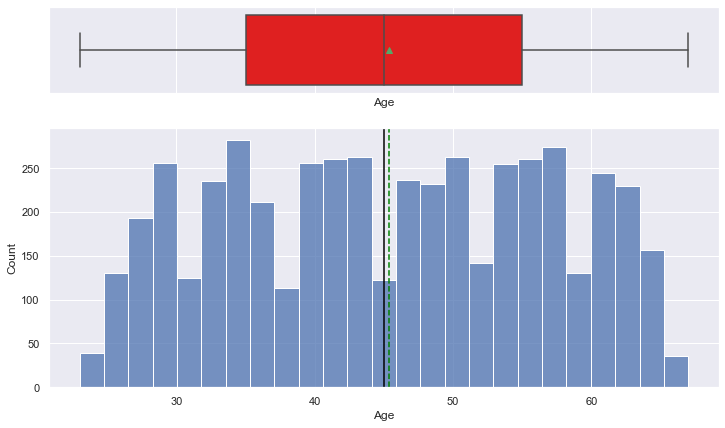

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(data1, "Age", bins=25)

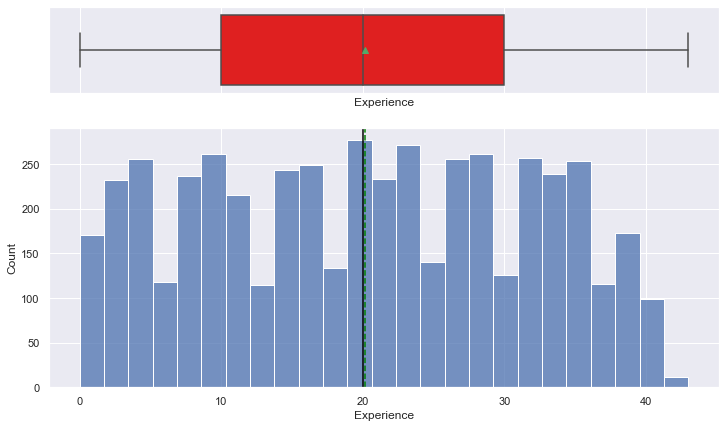

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(data1, "Experience", bins=25)

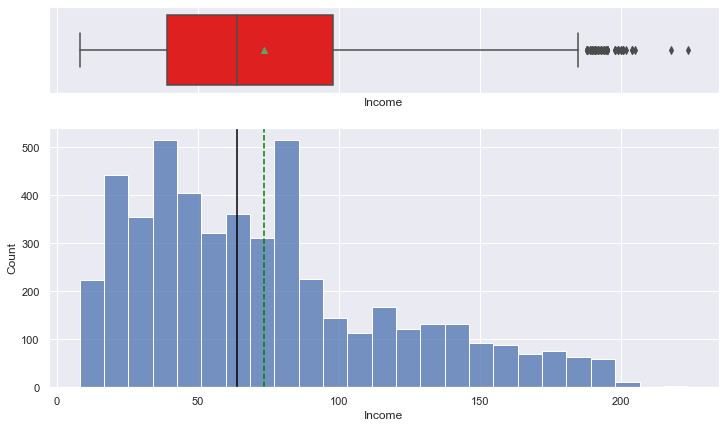

<IPython.core.display.Javascript object>

In [35]:
histogram_boxplot(data1, "Income", bins=25)

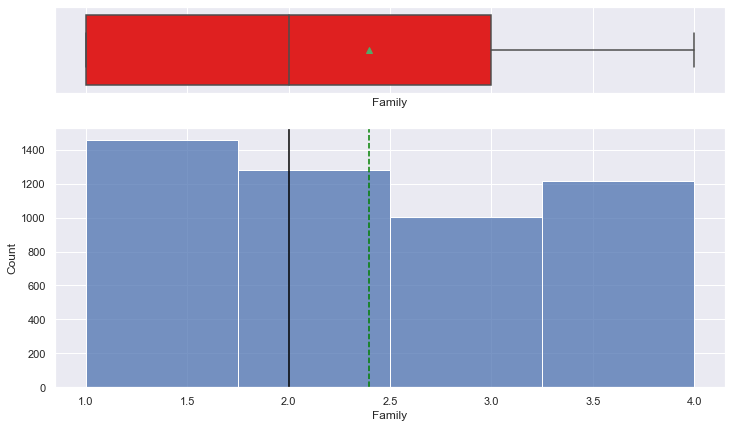

<IPython.core.display.Javascript object>

In [36]:
histogram_boxplot(data1, "Family", bins=4)

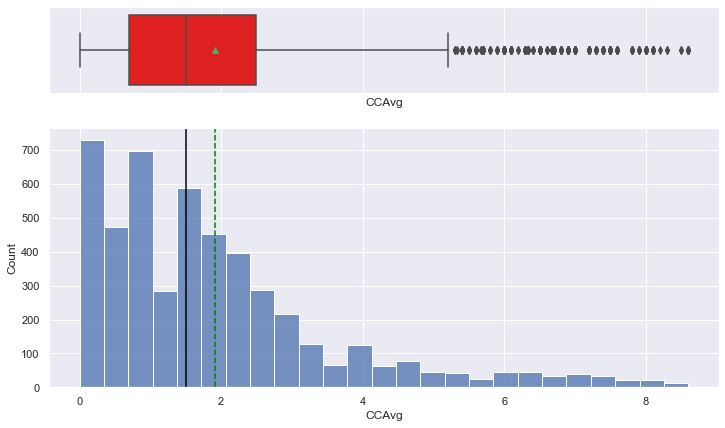

<IPython.core.display.Javascript object>

In [37]:
histogram_boxplot(data1, "CCAvg", bins=25)

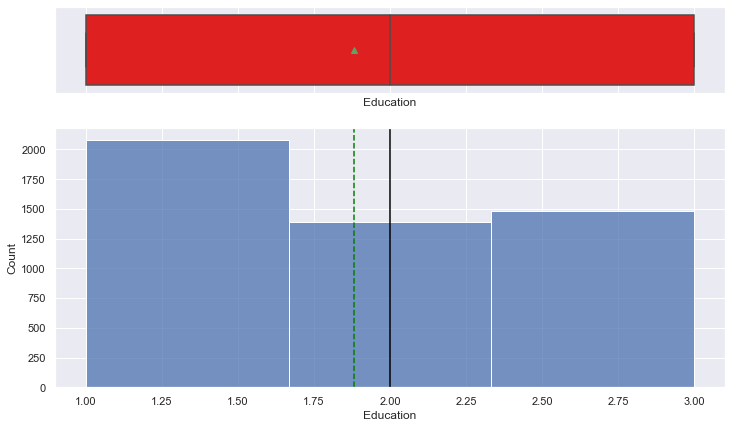

<IPython.core.display.Javascript object>

In [38]:
histogram_boxplot(data1, "Education", bins=3)

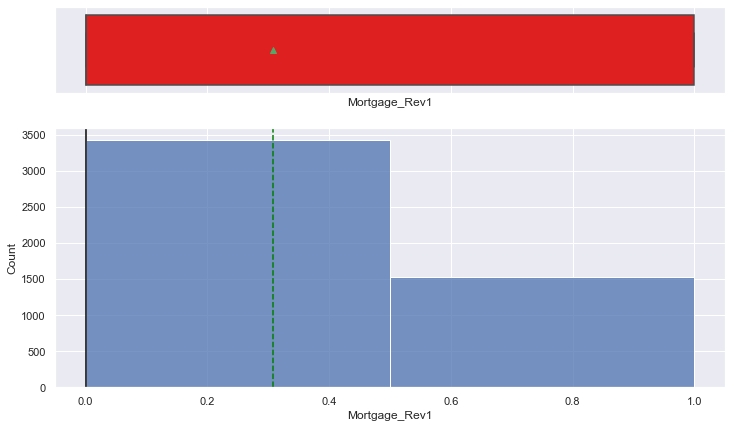

<IPython.core.display.Javascript object>

In [39]:
histogram_boxplot(data1, "Mortgage_Rev1", bins=2)

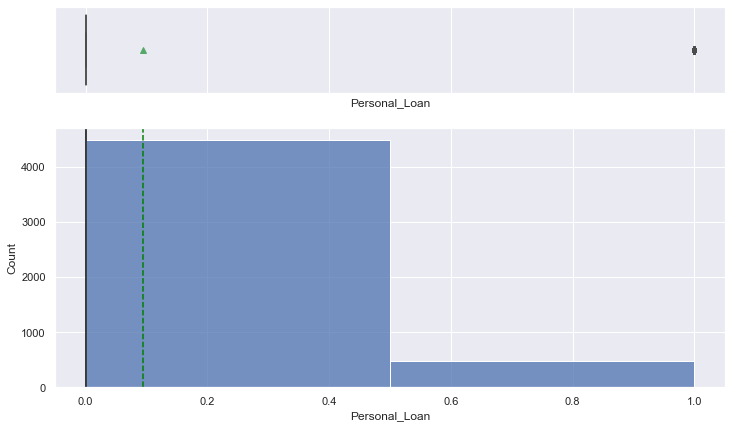

<IPython.core.display.Javascript object>

In [40]:
histogram_boxplot(data1, "Personal_Loan", bins=2)

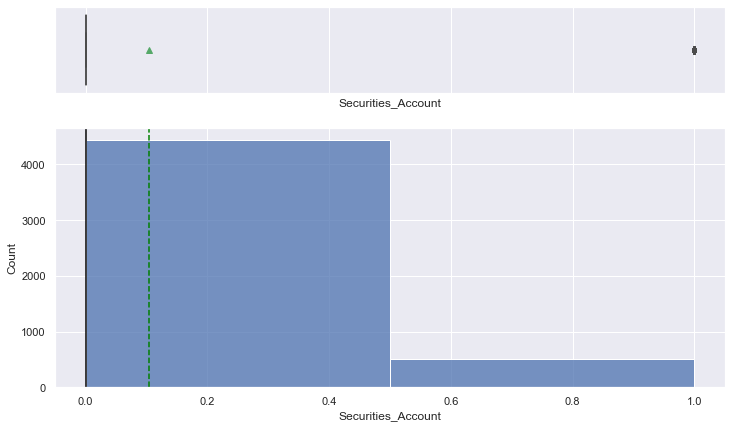

<IPython.core.display.Javascript object>

In [41]:
histogram_boxplot(data1, "Securities_Account", bins=2)

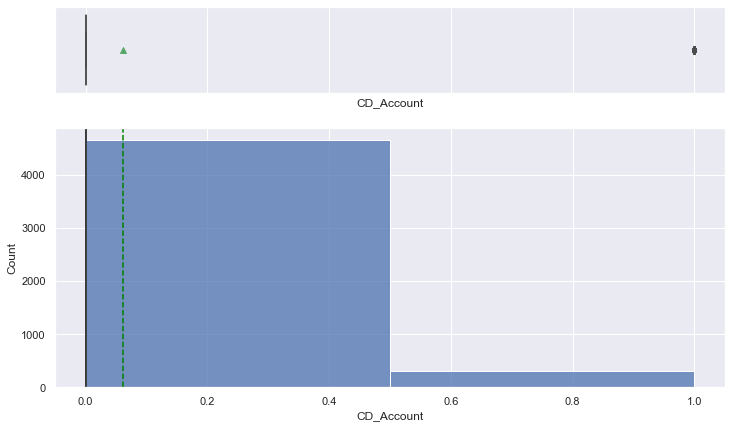

<IPython.core.display.Javascript object>

In [42]:
histogram_boxplot(data1, "CD_Account", bins=2)

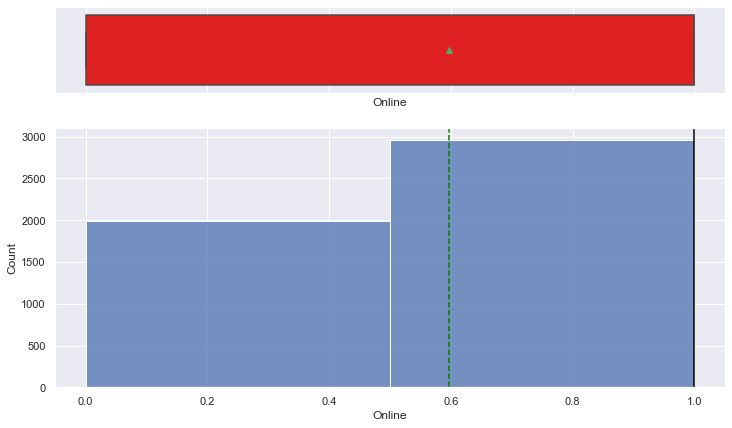

<IPython.core.display.Javascript object>

In [43]:
histogram_boxplot(data1, "Online", bins=2)

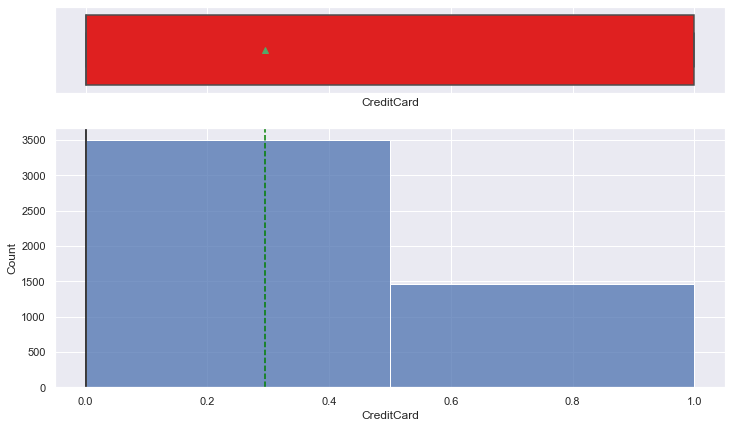

<IPython.core.display.Javascript object>

In [44]:
histogram_boxplot(data1, "CreditCard", bins=2)

In [45]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

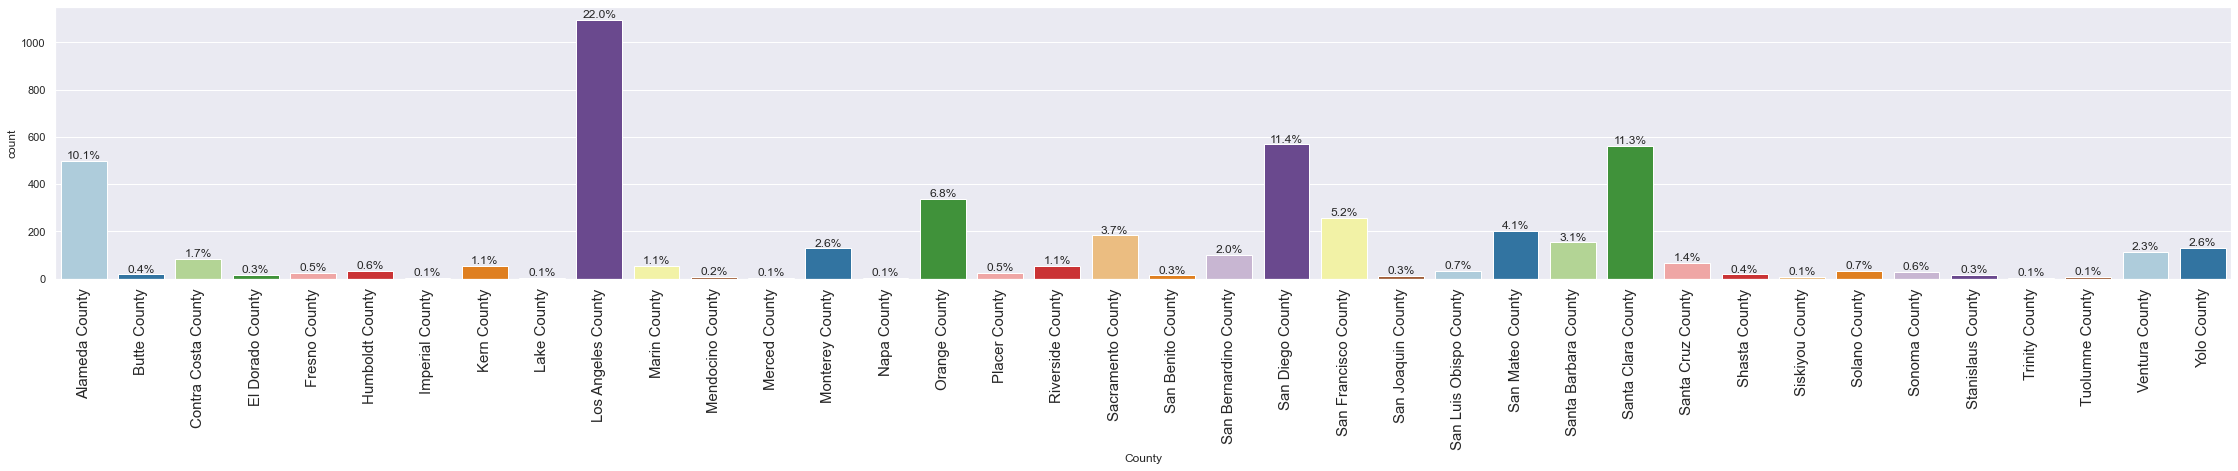

<IPython.core.display.Javascript object>

In [46]:
labeled_barplot(data, "County", perc=True)

# 5. Data Visualization - Bivariate

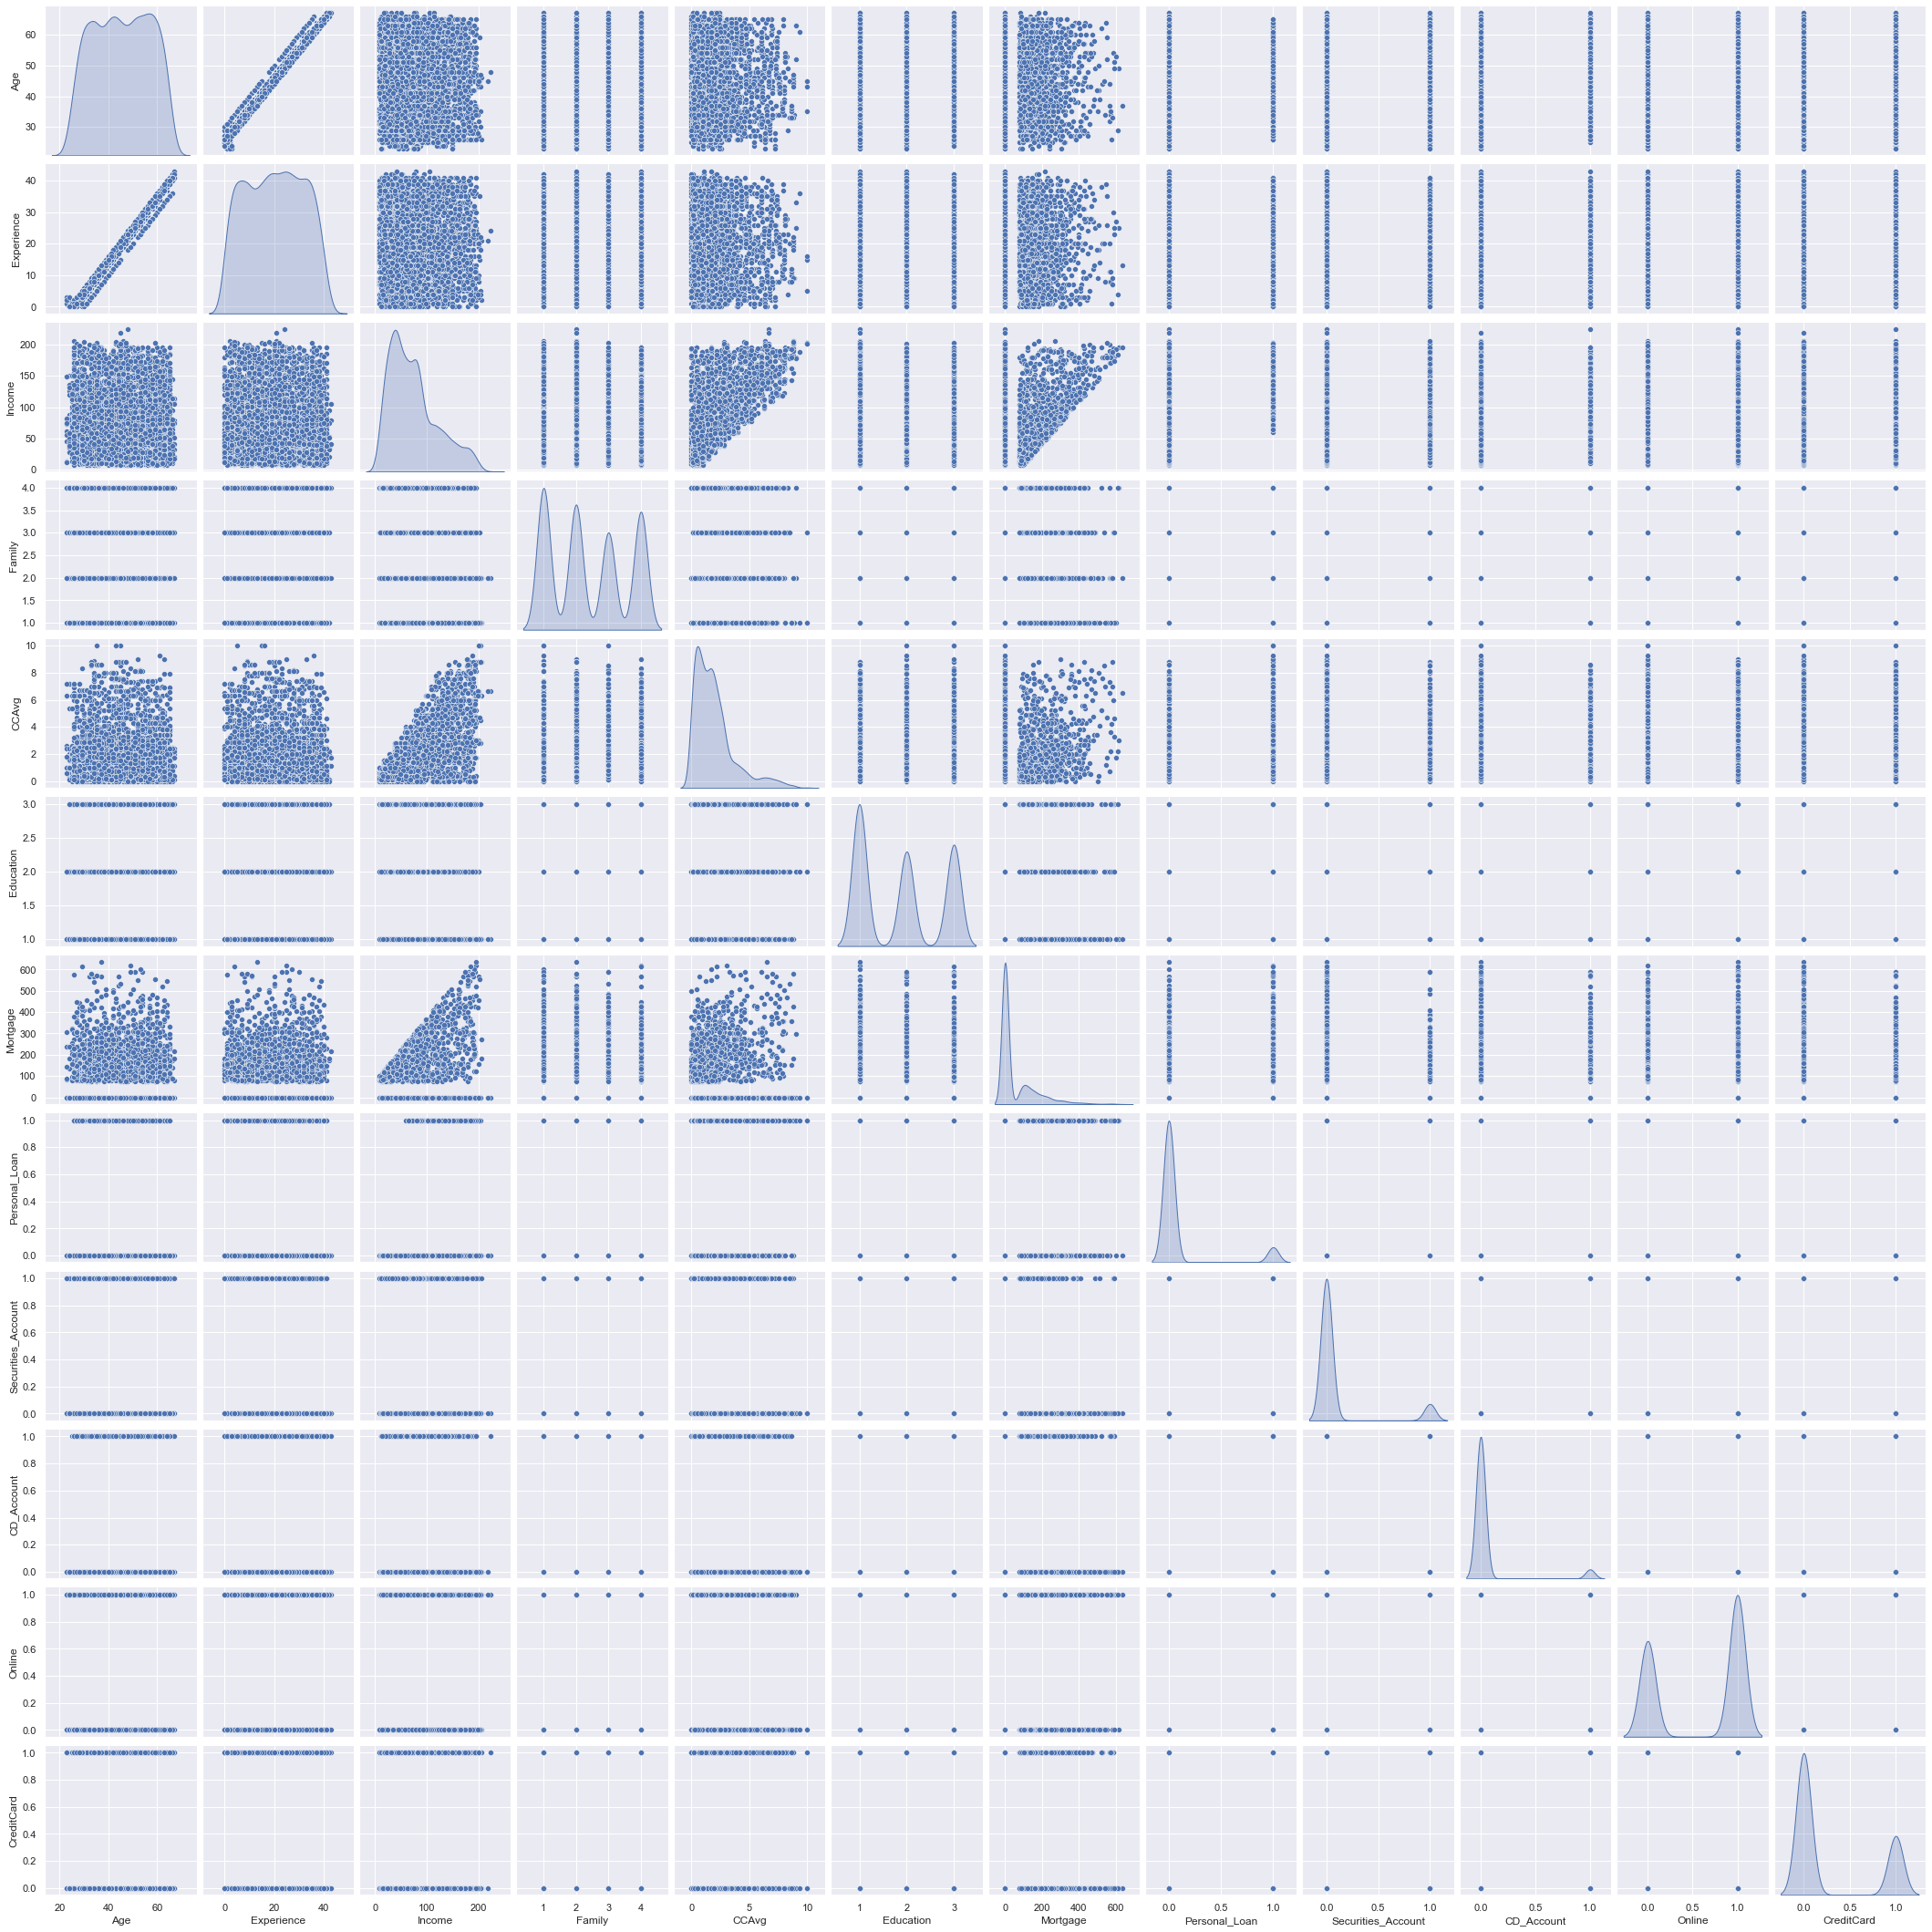

<IPython.core.display.Javascript object>

In [47]:
sns.pairplot(
    data, diag_kind="kde"
)  # KDE to plot density curve instead of histogram on the diag

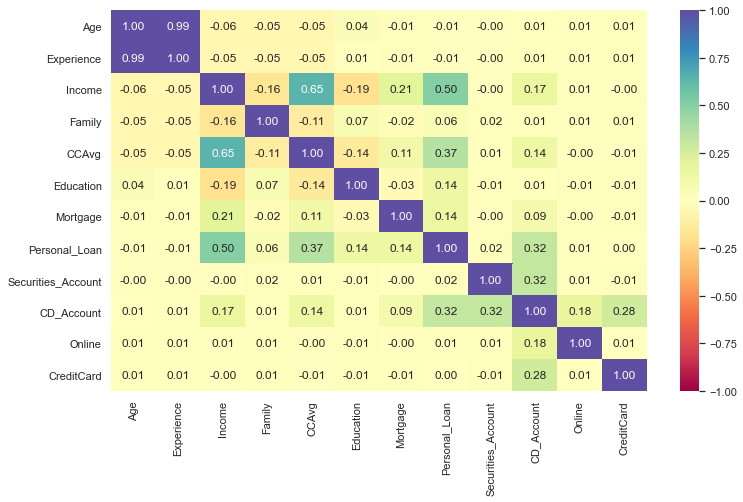

<IPython.core.display.Javascript object>

In [48]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

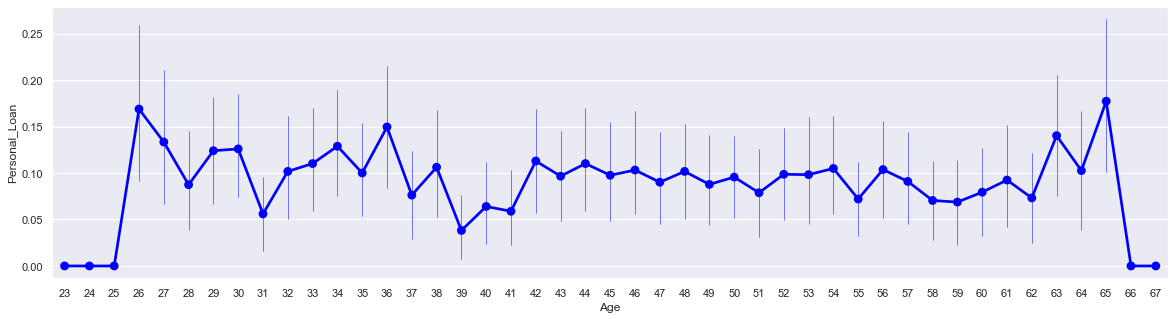

<IPython.core.display.Javascript object>

In [49]:
plt.figure(figsize=(20, 5))
sns.pointplot(x="Age", y="Personal_Loan", data=data1, color="blue", errwidth=0.5)
plt.show()

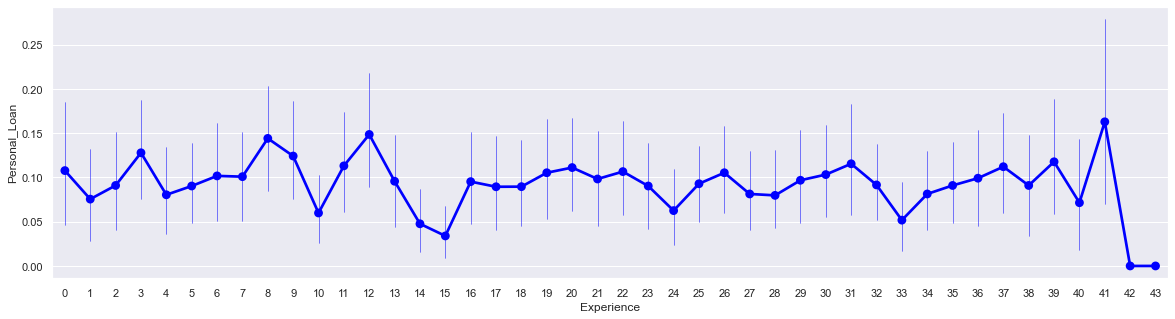

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(20, 5))
sns.pointplot(x="Experience", y="Personal_Loan", data=data1, color="blue", errwidth=0.5)
plt.show()

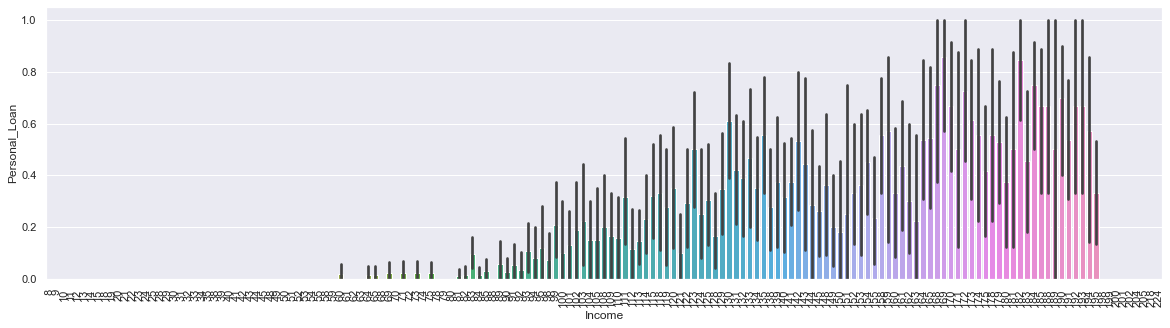

<IPython.core.display.Javascript object>

In [51]:
plt.figure(figsize=(20, 5))
sns.barplot(x="Income", y="Personal_Loan", data=data1)
plt.xticks(rotation=90)
plt.show()

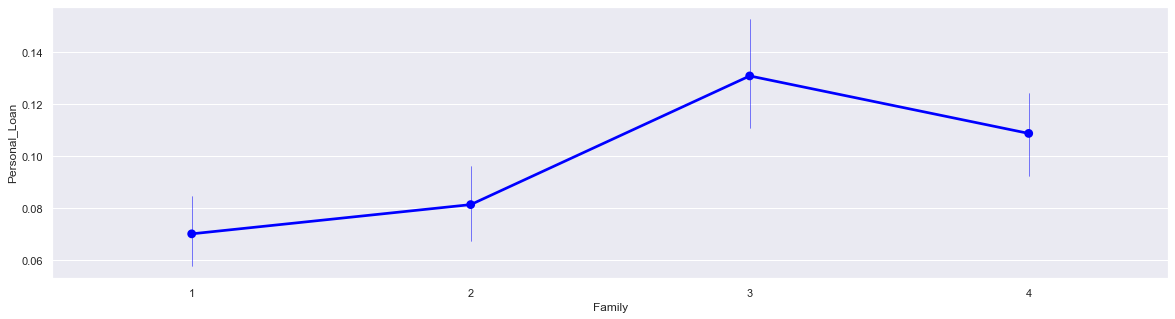

<IPython.core.display.Javascript object>

In [52]:
plt.figure(figsize=(20, 5))
sns.pointplot(x="Family", y="Personal_Loan", data=data1, color="blue", errwidth=0.5)
plt.show()

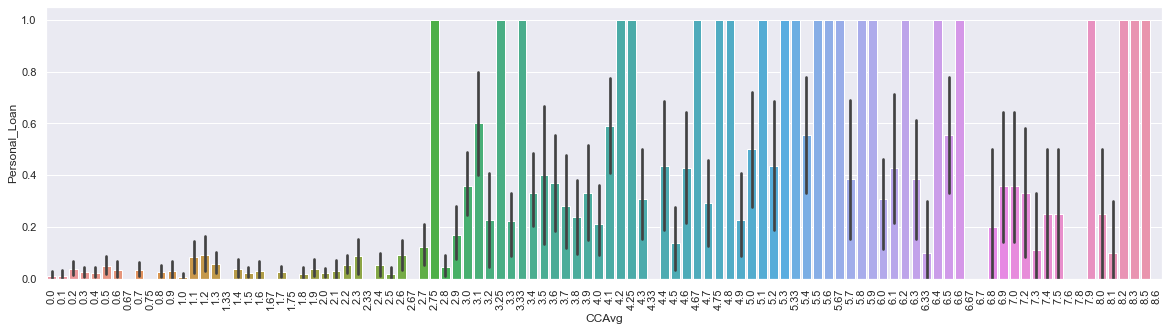

<IPython.core.display.Javascript object>

In [53]:
plt.figure(figsize=(20, 5))
sns.barplot(x="CCAvg", y="Personal_Loan", data=data1)
plt.xticks(rotation=90)
plt.show()

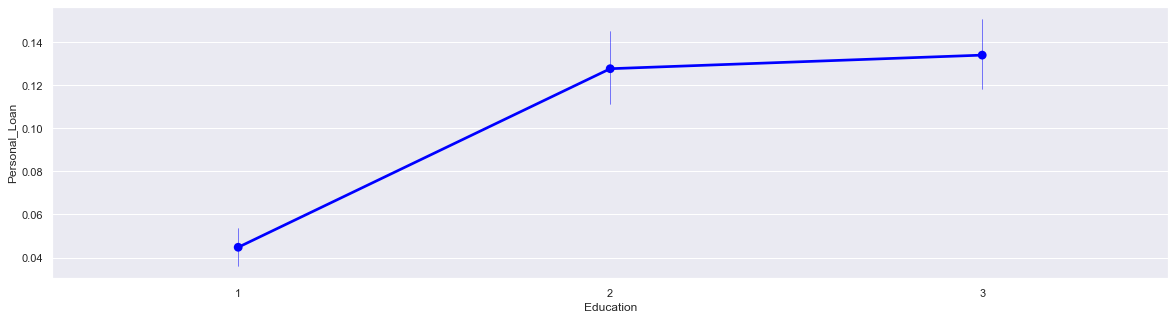

<IPython.core.display.Javascript object>

In [54]:
plt.figure(figsize=(20, 5))
sns.pointplot(x="Education", y="Personal_Loan", data=data1, color="blue", errwidth=0.5)
plt.show()

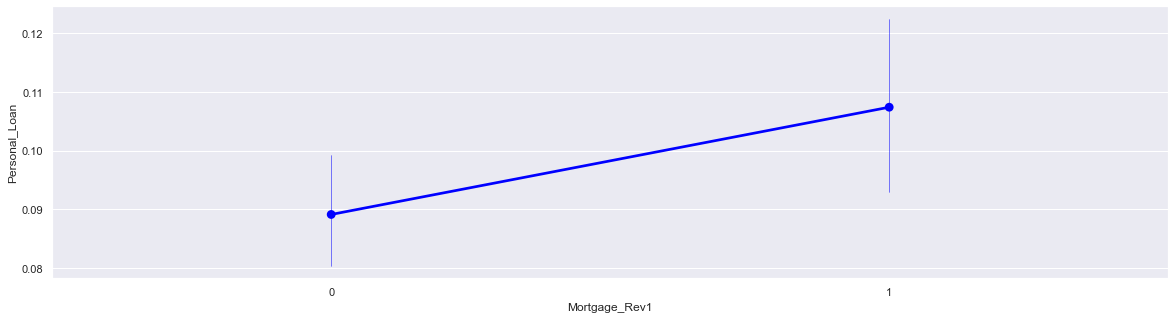

<IPython.core.display.Javascript object>

In [55]:
plt.figure(figsize=(20, 5))
sns.pointplot(
    x="Mortgage_Rev1", y="Personal_Loan", data=data1, color="blue", errwidth=0.5
)
plt.show()

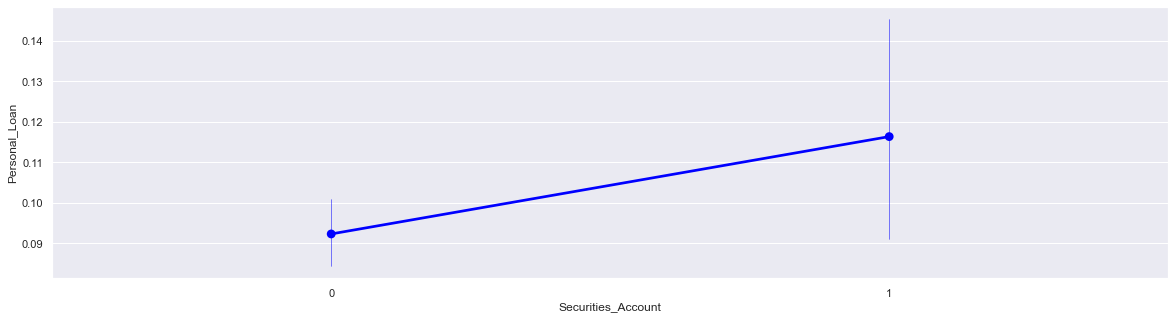

<IPython.core.display.Javascript object>

In [56]:
plt.figure(figsize=(20, 5))
sns.pointplot(
    x="Securities_Account", y="Personal_Loan", data=data1, color="blue", errwidth=0.5
)
plt.show()

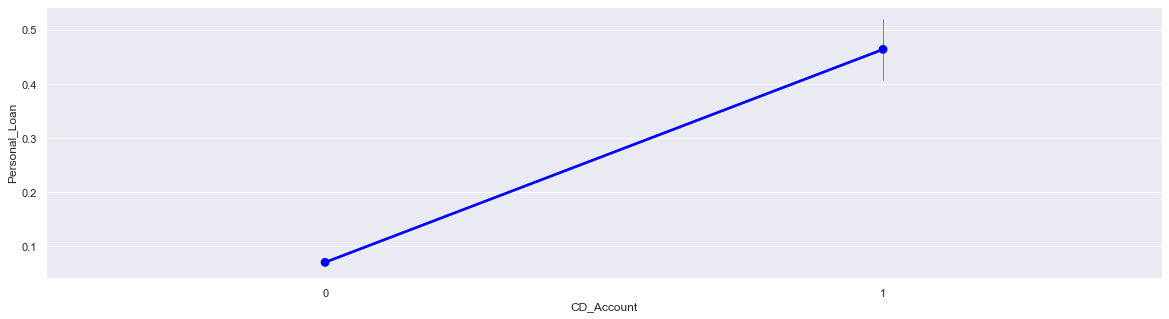

<IPython.core.display.Javascript object>

In [57]:
plt.figure(figsize=(20, 5))
sns.pointplot(x="CD_Account", y="Personal_Loan", data=data1, color="blue", errwidth=0.5)
plt.show()

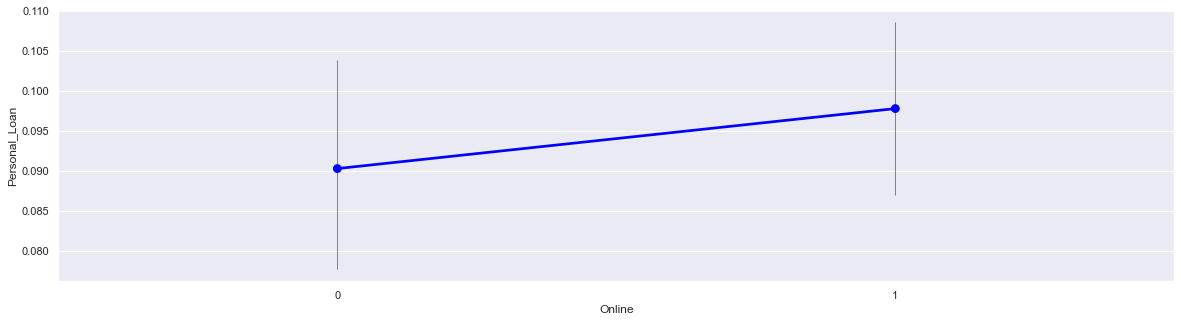

<IPython.core.display.Javascript object>

In [58]:
plt.figure(figsize=(20, 5))
sns.pointplot(x="Online", y="Personal_Loan", data=data1, color="blue", errwidth=0.5)
plt.show()

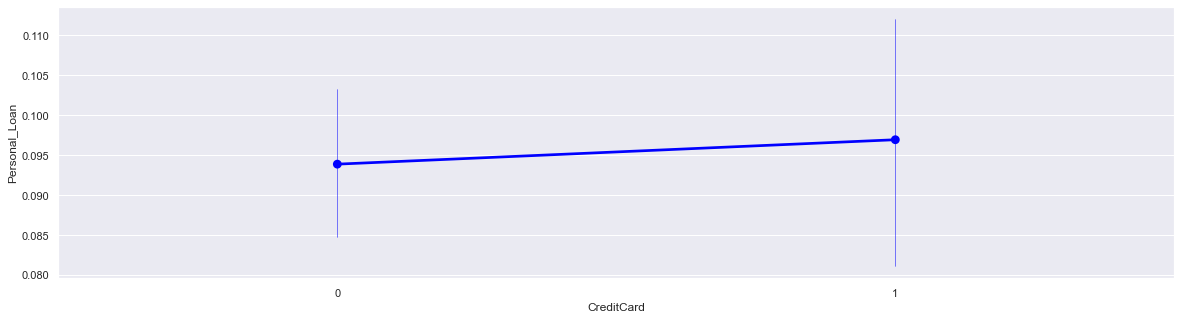

<IPython.core.display.Javascript object>

In [59]:
plt.figure(figsize=(20, 5))
sns.pointplot(x="CreditCard", y="Personal_Loan", data=data1, color="blue", errwidth=0.5)
plt.show()

# #. Observations
### * The mean `Age` of customers is ~45 years old which aligns with the median. With customers ranging from 23 to 67 years old.
### * The average years of `Experience` is 20 years which aligns with the median and also correlates with the `Age` of customers.
### * The range of `Income` was pretty wide going from 8k to 224k, but the mean of ~73k and median of 64k are inline with the US 2020 average household income of 67.5k per the US Census Bureau. There is skewing being done by some of the higher incomes but I decided to keep that info in the dataset.
### * `Family` size is showing a mean of 2.4 and a median of 2. These numbers tell us a majority of customers have at least 1 other person in their household (spouse or a child) and the the skewness implies both (spouse and a child). I am surprised the max value here is 4, as I know many families with higher numbers. 
### * The span of `CCAvg` or credit card average spending a month is 0 to 10k. I can believe that some customers wouldn't have a CC and therefore would not have CC expenditures every month. The max of 10k seems high to me so I cut out the data points that were above 4*IQR to get rid of extreme outliers.
### * `Education` rates show 50 percent of customers have an undergraduate degree.
### * Using the `Mortgage_Rev1`  we see that ~30% of customers have a mortgage.
### * The `Personal_Loan` was taken by 9.4% of customers.
### * Most customers do not have a `Securities_Account`, a `CD_Account`, or an outside `CreditCard`
### * ~60% of customers use an `Online` banking account.
### * A majority of customers in the dataset (55%) live in just four counties; Los Angeles County, San Diego County, Santa Clara County, and Alameda Couny. With 22% living in Los Angeles County. These counties are home to four of the largest cities in California; Los Angeles, San Diego, San Jose, and Oakland.
### * Having a `CD_account` correlates with taking the loan better then a `Securities_Account` or `CreditCard`

## * The average customer profile for AllLife Bank is;
### * 45 years old
### * 20 years work experience
### * Earning 73k per year
### * With a family size of 2.4 
### * Spends 1.9k on credit cards per month
### * Has an undergraduate degree
### * Does not own a home
### * Did not take a personal loan during the last campaign
### * Does not have a Securities or CD account, or outside credit cards
### * Banks Online
### * And likely live in Los Angeles, San Diego, Santa Clara, or Alameda counties

# 6. Splitting the test and train data

In [60]:
X = data1.drop("Personal_Loan", axis=1)  # Predictor feature columns (49 X m)
Y = data1["Personal_Loan"]  # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [61]:
print(
    "{0:0.2f}% data is in training set".format((len(x_train) / len(data1.index)) * 100)
)
print("{0:0.2f}% data is in test set".format((len(x_test) / len(data1.index)) * 100))

70.00% data is in training set
30.00% data is in test set


<IPython.core.display.Javascript object>

In [62]:
print(
    "Original Customer Took Loan True Values    : {0} ({1:0.2f}%)".format(
        len(data1.loc[data1["Personal_Loan"] == 1]),
        (len(data1.loc[data1["Personal_Loan"] == 1]) / len(data1.index)) * 100,
    )
)
print(
    "Original Customer Took Loan False Values   : {0} ({1:0.2f}%)".format(
        len(data1.loc[data1["Personal_Loan"] == 0]),
        (len(data1.loc[data1["Personal_Loan"] == 0]) / len(data1.index)) * 100,
    )
)
print("")
print(
    "Training Customer Took Loan True Values    : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 1]),
        (len(y_train[y_train[:] == 1]) / len(y_train)) * 100,
    )
)
print(
    "Training Customer Took Loan False Values   : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 0]),
        (len(y_train[y_train[:] == 0]) / len(y_train)) * 100,
    )
)
print("")
print(
    "Test Customer Took Loan True Values        : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test)) * 100
    )
)
print(
    "Test Customer Took Loan False Values       : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test)) * 100
    )
)
print("")

Original Customer Took Loan True Values    : 469 (9.47%)
Original Customer Took Loan False Values   : 4481 (90.53%)

Training Customer Took Loan True Values    : 325 (9.38%)
Training Customer Took Loan False Values   : 3140 (90.62%)

Test Customer Took Loan True Values        : 144 (9.70%)
Test Customer Took Loan False Values       : 1341 (90.30%)



<IPython.core.display.Javascript object>

# 7. Logistic Regression Modeling

In [63]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


<IPython.core.display.Javascript object>

In [64]:
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [65]:
# Fit the model on train
# Chose liblinear as it is good for small datasets
lg = LogisticRegression(solver="liblinear", random_state=1)
model = lg.fit(x_train, y_train)

<IPython.core.display.Javascript object>

In [66]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,Age,Experience,Income,Family,CCAvg,Education,Mortgage_Rev1,Securities_Account,CD_Account,Online,CreditCard,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County,Intercept
Coefficients,-0.435793,0.441807,0.051872,0.65963,0.131711,1.664896,0.161236,-0.673152,3.187825,-0.69523,-0.914238,0.441351,0.286255,0.136713,-0.223567,-0.408859,-0.001175,-0.147229,-0.022354,0.150488,0.758871,0.047106,-0.368023,0.033602,0.0,-0.069948,0.113143,0.408648,0.316463,-0.095526,-0.655136,0.421261,-0.00149,-0.370589,-0.484709,-0.704235,0.140489,0.473694,-0.606568,-0.26185,-0.034723,0.473506,0.487836,-0.276167,-0.083608,-0.001325,0.075881,-0.013346,-2.081421


<IPython.core.display.Javascript object>

### * The negative coefficients `Age`, `Securities_Account`, `Online`, `CreditCard`, and many of the counties would lessen the chance of a customer taking a `Personal_Loan` as they go up. 
### * Increasing the `Experience`, `Income`, `Family`, `CCAvg`, `Education`, `Mortgage_Rev1`, `CD_Account` and the other counties would increase the chance of a customer taking a `Personal_Loan`as they go up.


In [67]:
# Taking the coefficients and converting them to odds.

# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train.columns).T

,Age,Experience,Income,Family,CCAvg,Education,Mortgage_Rev1,Securities_Account,CD_Account,Online,CreditCard,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County
Odds,0.646752,1.555516,1.053241,1.934076,1.140778,5.285126,1.174962,0.510098,24.235650,0.498960,0.400822,1.554806,1.331432,1.146499,0.799661,0.664408,0.998826,0.863097,0.977894,1.162401,2.135863,1.048233,0.692101,1.034173,1.0,0.932442,1.119792,1.504782,1.372266,0.908895,0.519372,1.523883,0.998511,0.690328,0.615876,0.494487,1.150837,1.605916,0.545219,0.769626,0.965873,1.605614,1.628788,0.758686,0.919792,0.998676,1.078835,0.986743
Change_odd%,-35.324811,55.551604,5.324078,93.407569,14.077816,428.512564,17.496228,-48.990197,2323.565017,-50.104025,-59.917794,55.480638,33.143188,14.649891,-20.033869,-33.559191,-0.117444,-13.690336,-2.210597,16.240103,113.586315,4.823271,-30.789896,3.417316,0.0,-6.755795,11.979240,50.478194,37.226560,-9.110526,-48.062834,52.388265,-0.148922,-30.967228,-38.412358,-50.551324,15.083654,60.591588,-45.478106,-23.037360,-3.412698,60.561415,62.878815,-24.131386,-8.020823,-0.132410,7.883458,-1.325695


<IPython.core.display.Javascript object>

## Interpreting the odds.
### * `Age`: Holding all other features constant a 1 unit change in Age will decrease the odds of a person taking a Personal Loan by 0.65 times or a 35.33% decrease in odds of taking a Personal Loan.
### * `Experience`: Holding all other features constant a 1 unit change in Experience will increase the odds of a person taking a Personal Loan by 1.56 times or a 55.55% increase in odds of taking a Personal Loan.
### * `Income`: Holding all other features constant a 1 unit change in Income will increase the odds of a person taking a Personal Loan by 1.05 times or a 5.32% increase in odds of taking a Personal Loan.
### * `Family`: Holding all other features constant a 1 unit change in Family will increase the odds of a person taking a Personal Loan by 1.93 times or a 93.41% increase in odds of taking a Personal Loan.
### * `CCAvg`: Holding all other features constant a 1 unit change in CCAvg will increase the odds of a person taking a Personal Loan by 1.14 times or a 14.08% increase in odds of taking a Personal Loan.
### * `Education`: Holding all other features constant a 1 unit change in Education will increase the odds of a person taking a Personal Loan by 5.29 times or a 428.5% increase in odds of taking a Personal Loan.
### * `Mortgage_Rev1`: Holding all other features constant a 1 unit change in Mortgage_Rev1 will increase the odds of a person taking a Personal Loan by 1.18 times or a 17.5% increase in odds of taking a Personal Loan.
### * `Securities_Account`: Holding all other features constant a 1 unit change in Securities_Account will decrease the odds of a person taking a Personal Loan by 0.51 times or a 48.99% decrease in odds of taking a Personal Loan.
### * `CD_Account`: Holding all other features constant a 1 unit change in CD_Account will increase the odds of a person taking a Personal Loan by 24.24 times or a 2323.57% increase in odds of taking a Personal Loan.
### * `Online`: Holding all other features constant a 1 unit change in Online will decrease the odds of a person taking a Personal Loan by 0.5 times or a 50.1% decrease in odds of taking a Personal Loan.
### * `CreditCard`: Holding all other features constant a 1 unit change in Securities_Account will decrease the odds of a person taking a Personal Loan by 0.4 times or a 59.92% decrease in odds of taking a Personal Loan.
### * `Marin_County`: Holding all other features constant a 1 unit change in Marin_County will increase the odds of a person taking a Personal Loan by 2.14 times or a 113.59% increase in odds of taking a Personal Loan. (This was the biggest impactor in counties)

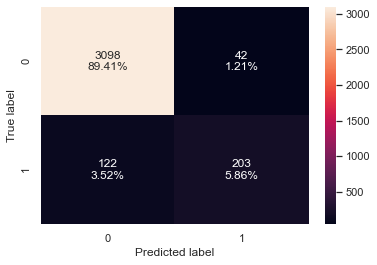

<IPython.core.display.Javascript object>

In [68]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, x_train, y_train)

In [69]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, x_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.95267,0.624615,0.828571,0.712281


<IPython.core.display.Javascript object>

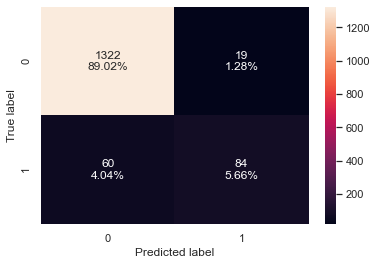

<IPython.core.display.Javascript object>

In [70]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, x_test, y_test)

In [71]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, x_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.946801,0.583333,0.815534,0.680162


<IPython.core.display.Javascript object>

### * The F1 Score is quite low so the logistic regression model is not great. Next, I will try ROC AUC 

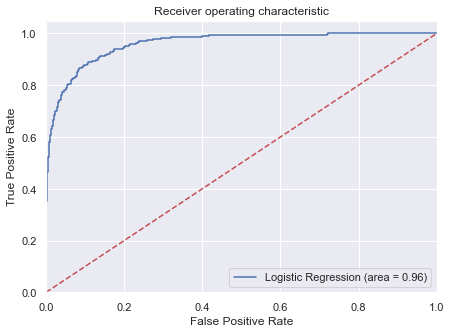

<IPython.core.display.Javascript object>

In [72]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(x_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(x_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

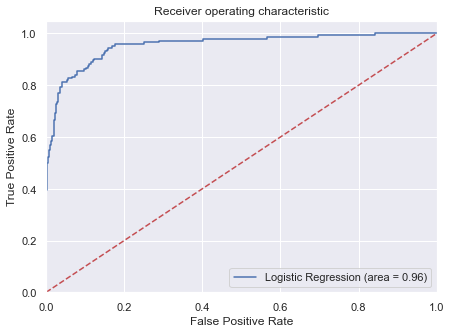

<IPython.core.display.Javascript object>

In [73]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(x_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(x_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [74]:
# Finding and optimal threashold using AUC-ROC
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(x_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.13438042132901554


<IPython.core.display.Javascript object>

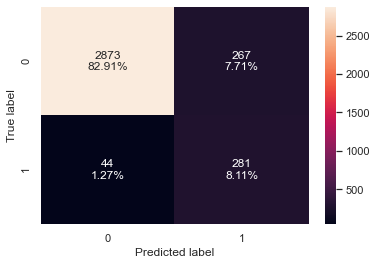

<IPython.core.display.Javascript object>

In [75]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, x_train, y_train, threshold=optimal_threshold_auc_roc
)

In [76]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, x_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.910245,0.864615,0.512774,0.643757


<IPython.core.display.Javascript object>

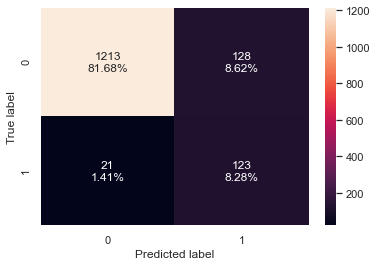

<IPython.core.display.Javascript object>

In [77]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, x_test, y_test, threshold=optimal_threshold_auc_roc
)

In [78]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, x_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.899663,0.854167,0.49004,0.622785


<IPython.core.display.Javascript object>

### This also has a low F1. Next, I will try Precision Recall

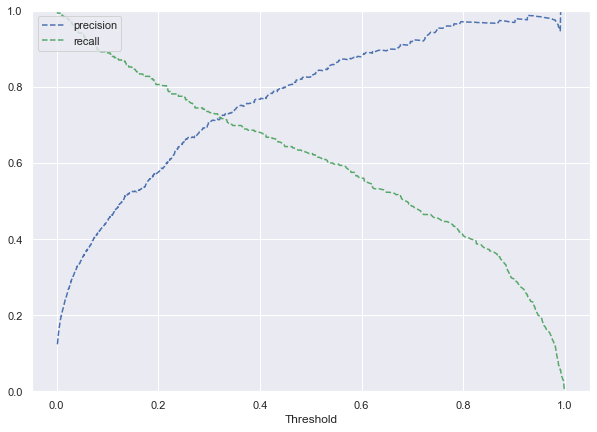

<IPython.core.display.Javascript object>

In [79]:
y_scores = lg.predict_proba(x_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [80]:
# The Threshold is balanced around .33
# setting the threshold
optimal_threshold_curve = 0.33

<IPython.core.display.Javascript object>

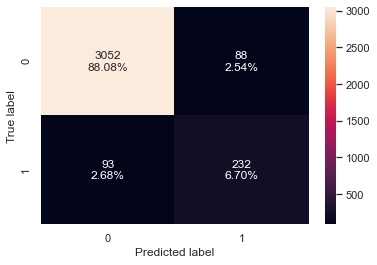

<IPython.core.display.Javascript object>

In [81]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, x_train, y_train, threshold=optimal_threshold_curve
)

In [82]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, x_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.947763,0.713846,0.725,0.71938


<IPython.core.display.Javascript object>

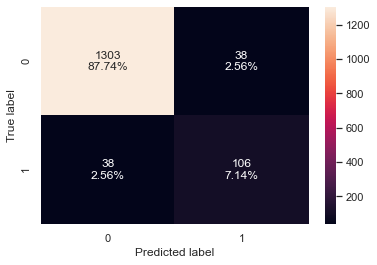

<IPython.core.display.Javascript object>

In [83]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, x_test, y_test, threshold=optimal_threshold_curve
)

In [84]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, x_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.948822,0.736111,0.736111,0.736111


<IPython.core.display.Javascript object>

### This performed best in F1, Precision, and Recall.

### Below is comparison of the three models run so far

In [85]:
# training performance summary

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.13 Threshold",
    "Logistic Regression-0.33 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.13 Threshold,Logistic Regression-0.33 Threshold
Accuracy,0.952670,0.910245,0.947763
Recall,0.624615,0.864615,0.713846
Precision,0.828571,0.512774,0.725000
F1,0.712281,0.643757,0.719380


<IPython.core.display.Javascript object>

In [86]:
# testing performance summary

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.13 Threshold",
    "Logistic Regression-0.33 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.13 Threshold,Logistic Regression-0.33 Threshold
Accuracy,0.946801,0.899663,0.948822
Recall,0.583333,0.854167,0.736111
Precision,0.815534,0.490040,0.736111
F1,0.680162,0.622785,0.736111


<IPython.core.display.Javascript object>

### The .33 Model has had the best outcome, but I will try using the Sequential Feature Selector to build a better model.

In [87]:
# Sequential feature selector is present in mlxtend library

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

<IPython.core.display.Javascript object>

In [88]:
# from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear", n_jobs=-1, random_state=1, max_iter=100)

<IPython.core.display.Javascript object>

In [89]:
# building with all variables
sfs = SFS(
    model,
    k_features=48,
    forward=True,
    floating=False,
    scoring="f1",
    verbose=2,
    cv=3,
    n_jobs=-1,
)

sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    2.6s finished

[2021-12-18 03:35:34] Features: 1/48 -- score: 0.36893943266036294[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  47 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    0.1s finished

[2021-12-18 03:35:35] Features: 2/48 -- score: 0.5885627119744251[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  46 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    0.1s finished

[2021-12-18 03:35:35] Features: 3/48 -- score: 0.6285500005822823[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2

[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.0s finished

[2021-12-18 03:35:41] Features: 32/48 -- score: 0.6834120733053237[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2021-12-18 03:35:41] Features: 33/48 -- score: 0.6834120733053237[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished

[2021-12-18 03:35:41] Features: 34/48 -- score: 0.6834120733053237[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 ou

<IPython.core.display.Javascript object>

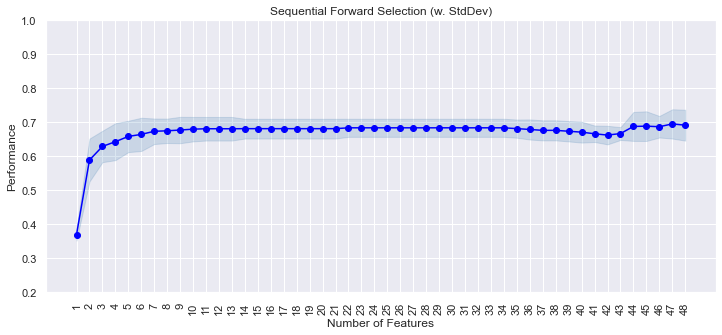

<IPython.core.display.Javascript object>

In [90]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_dev", figsize=(12, 5))
plt.ylim([0.2, 1])
plt.title("Sequential Forward Selection (w. StdDev)")
plt.xticks(rotation=90)
plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.1s finished

[2021-12-18 03:35:45] Features: 1/9 -- score: 0.36893943266036294[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  47 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    0.1s finished

[2021-12-18 03:35:45] Features: 2/9 -- score: 0.5885627119744251[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    0.1s finished

[2021-12-18 03:35:46] Features: 3/9 -- score: 0.6285500005822823[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.1s finished

[2021-12-18 03:35:46] Features: 4/9 -- score: 0.64255

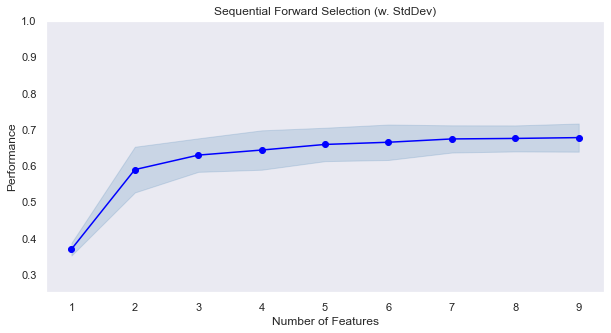

<IPython.core.display.Javascript object>

In [91]:
sfs1 = SFS(
    model,
    k_features=9,
    forward=True,
    floating=False,
    scoring="f1",
    verbose=2,
    cv=3,
    n_jobs=-1,
)

sfs1 = sfs1.fit(x_train, y_train)

fig1 = plot_sfs(sfs1.get_metric_dict(), kind="std_dev", figsize=(10, 5))

plt.ylim([0.25, 1])
plt.title("Sequential Forward Selection (w. StdDev)")
plt.grid()
plt.show()

In [92]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

x_train.columns[feat_cols]

[2, 3, 5, 8, 10, 20, 25, 30, 35]


Index(['Income', 'Family', 'Education', 'CD_Account', 'CreditCard',
       'County_Marin County', 'County_Orange County',
       'County_San Bernardino County', 'County_San Mateo County'],
      dtype='object')

<IPython.core.display.Javascript object>

In [93]:
x_train_final = x_train[x_train.columns[feat_cols]]

# Creating new x_test with the same variables that we selected for x_train
x_test_final = x_test[x_train_final.columns]

<IPython.core.display.Javascript object>

In [94]:
# Fitting logistic regession model

logreg = LogisticRegression(solver="liblinear", verbose=True, n_jobs=-1, random_state=0)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000
# max_iter indicates number of iteration needed to converge

logreg.fit(x_train_final, y_train)

[LibLinear]

LogisticRegression(n_jobs=-1, random_state=0, solver='liblinear', verbose=True)

<IPython.core.display.Javascript object>

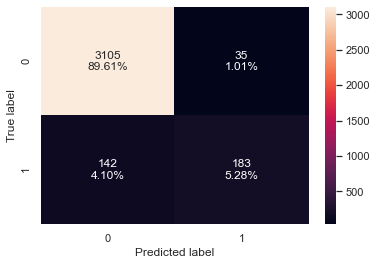

<IPython.core.display.Javascript object>

In [95]:
confusion_matrix_sklearn_with_threshold(logreg, x_train_final, y_train)

In [96]:
log_reg_model_train_perf_SFS = model_performance_classification_sklearn_with_threshold(
    logreg, x_train_final, y_train
)
print("Training performance:")
log_reg_model_train_perf_SFS

Training performance:


,Accuracy,Recall,Precision,F1
0,0.948918,0.563077,0.83945,0.674033


<IPython.core.display.Javascript object>

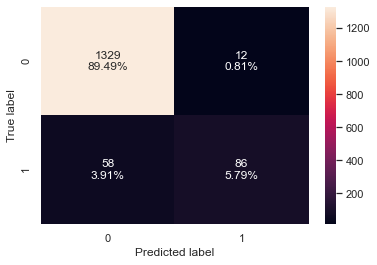

<IPython.core.display.Javascript object>

In [97]:
confusion_matrix_sklearn_with_threshold(logreg, x_test_final, y_test)

In [98]:
log_reg_model_test_perf_SFS = model_performance_classification_sklearn_with_threshold(
    logreg, x_test_final, y_test
)
print("Test set performance:")
log_reg_model_test_perf_SFS

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.952862,0.597222,0.877551,0.710744


<IPython.core.display.Javascript object>

In [99]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
        log_reg_model_train_perf_SFS.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.13 Threshold",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression - SFS",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.13 Threshold,Logistic Regression-0.33 Threshold,Logistic Regression - SFS
Accuracy,0.952670,0.910245,0.947763,0.948918
Recall,0.624615,0.864615,0.713846,0.563077
Precision,0.828571,0.512774,0.725000,0.839450
F1,0.712281,0.643757,0.719380,0.674033


<IPython.core.display.Javascript object>

In [100]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
        log_reg_model_test_perf_SFS.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.13 Threshold",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression - SFS",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.13 Threshold,Logistic Regression-0.33 Threshold,Logistic Regression - SFS
Accuracy,0.946801,0.899663,0.948822,0.952862
Recall,0.583333,0.854167,0.736111,0.597222
Precision,0.815534,0.490040,0.736111,0.877551
F1,0.680162,0.622785,0.736111,0.710744


<IPython.core.display.Javascript object>

### As you can see, the SFS Model performed better then two of the first three models, but the .33 model is still the best. 

## Logistic Regression Analysis
### * I was able to build a predictive model that could be used by the bank to find which customers are likely to take a Personal Loan with an f1_score of 0.74 on the test set.
### * The Coefficients of Experience, Income, Family, CCAvg, Education, Mortgage, CD_Account, and the counties of Marin, Orange, San Bernadino, and San Mateo will increase the probability of a customer taking a Personal Loan.
### * The Coefficients of Age, Securities_Account, Online, and CreditCard will decreas the probability of a customer taking a Personal Loan.




# 8. Decision Tree Modeling

In [101]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

In [102]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [103]:
# Building the initial decision tree
modelT = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

<IPython.core.display.Javascript object>

In [104]:
modelT.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

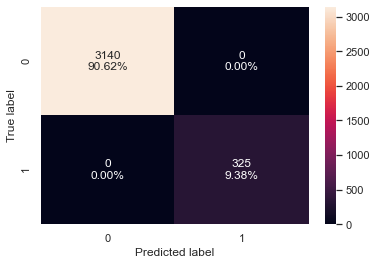

<IPython.core.display.Javascript object>

In [105]:
confusion_matrix_sklearn(modelT, x_train, y_train)

In [106]:
decision_tree_perf_train = get_recall_score(modelT, x_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


<IPython.core.display.Javascript object>

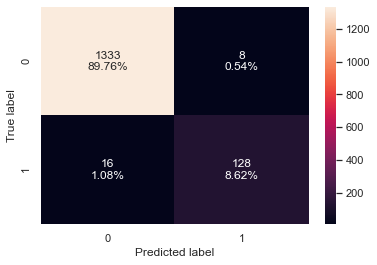

<IPython.core.display.Javascript object>

In [107]:
confusion_matrix_sklearn(modelT, x_test, y_test)

In [108]:
decision_tree_perf_test = get_recall_score(modelT, x_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8888888888888888


<IPython.core.display.Javascript object>

In [109]:
## creating a list of column names
feature_names = x_train.columns.to_list()

<IPython.core.display.Javascript object>

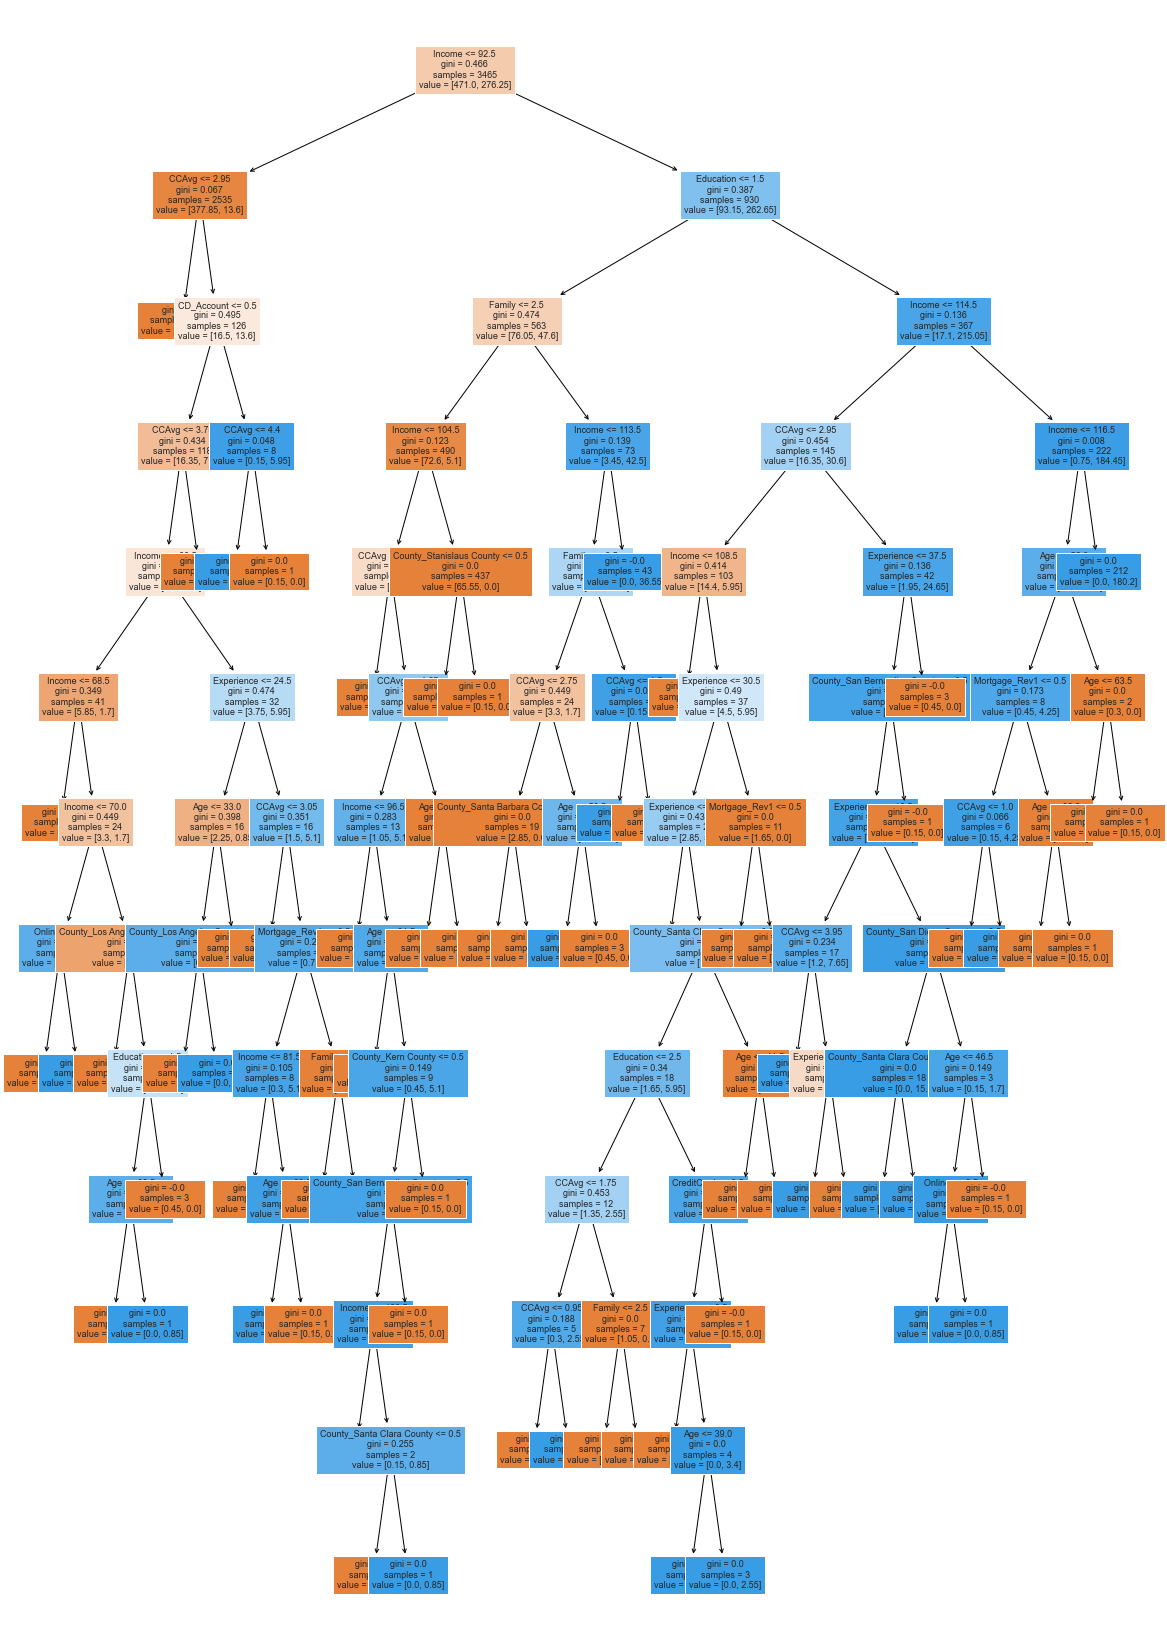

<IPython.core.display.Javascript object>

In [110]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    modelT,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [111]:
# Text report showing the rules of a decision tree -

print(tree.export_text(modelT, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [361.35, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.75
|   |   |   |   |--- Income <= 80.50
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [2.55, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- Income <= 70.00
|   |   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |--- Income >  70.00
|   |   |   |   |   |   |   |--- County_Los Angeles County <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [2.55, 0.00] class: 0
|   |   |   |   |   |   |   |--- County_Los Angeles County >  0.50
|   |   |   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |   |   |--- Age <= 38.50
|   |   |   

<IPython.core.display.Javascript object>

In [112]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        modelT.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
Income                         5.909084e-01
Education                      1.378568e-01
Family                         1.277065e-01
CCAvg                          9.466758e-02
Experience                     1.577044e-02
CD_Account                     1.204476e-02
Age                            9.247550e-03
Mortgage_Rev1                  3.632718e-03
County_Los Angeles County      2.556524e-03
County_Santa Clara County      1.748154e-03
County_San Bernardino County   1.560233e-03
CreditCard                     7.581615e-04
County_Kern County             7.476315e-04
Online                         7.322391e-04
County_San Diego County        6.231331e-05
County_Stanislaus County       1.316547e-15
County_Santa Barbara County    1.635462e-17
County_Solano County           0.000000e+00
County_Siskiyou County         0.000000e+00
County_Shasta County           0.000000e+00
County_Trinity County          0.000000e+00
County_Santa Cruz County       0

<IPython.core.display.Javascript object>

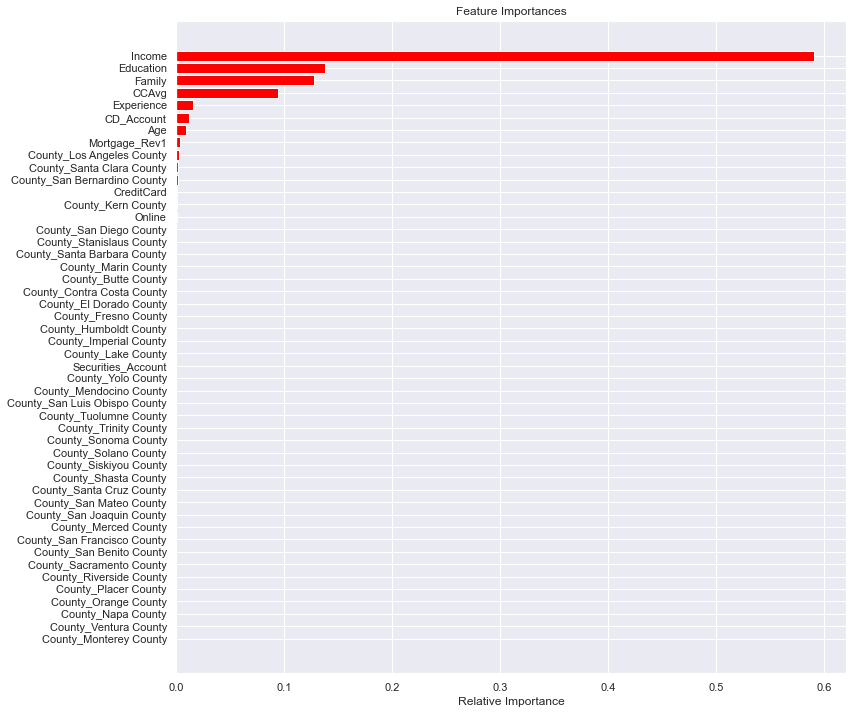

<IPython.core.display.Javascript object>

In [113]:
importances = modelT.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Using GridSearch for Hyperparameter Tuning

In [114]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 11, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=10, min_impurity_decrease=0.01, random_state=1,
                       splitter='random')

<IPython.core.display.Javascript object>

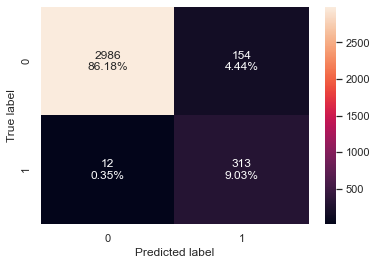

<IPython.core.display.Javascript object>

In [115]:
confusion_matrix_sklearn(estimator, x_train, y_train)

In [116]:
decision_tree_tune_perf_train = get_recall_score(estimator, x_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.963076923076923


<IPython.core.display.Javascript object>

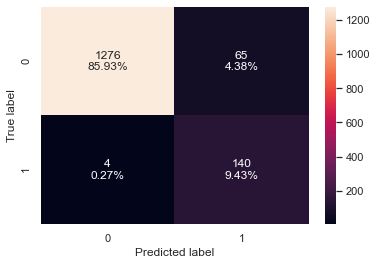

<IPython.core.display.Javascript object>

In [117]:
confusion_matrix_sklearn(estimator, x_test, y_test)

In [118]:
decision_tree_tune_perf_test = get_recall_score(estimator, x_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.9722222222222222


<IPython.core.display.Javascript object>

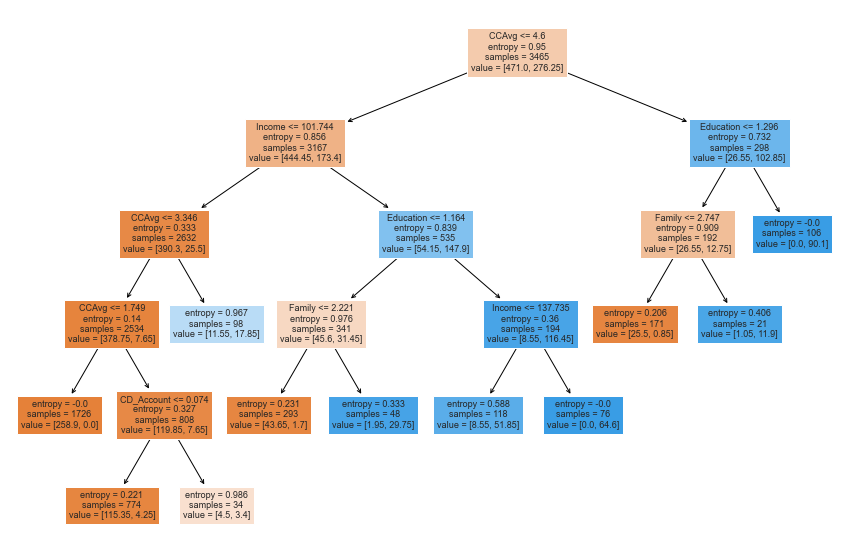

<IPython.core.display.Javascript object>

In [119]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [120]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- CCAvg <= 4.60
|   |--- Income <= 101.74
|   |   |--- CCAvg <= 3.35
|   |   |   |--- CCAvg <= 1.75
|   |   |   |   |--- weights: [258.90, 0.00] class: 0
|   |   |   |--- CCAvg >  1.75
|   |   |   |   |--- CD_Account <= 0.07
|   |   |   |   |   |--- weights: [115.35, 4.25] class: 0
|   |   |   |   |--- CD_Account >  0.07
|   |   |   |   |   |--- weights: [4.50, 3.40] class: 0
|   |   |--- CCAvg >  3.35
|   |   |   |--- weights: [11.55, 17.85] class: 1
|   |--- Income >  101.74
|   |   |--- Education <= 1.16
|   |   |   |--- Family <= 2.22
|   |   |   |   |--- weights: [43.65, 1.70] class: 0
|   |   |   |--- Family >  2.22
|   |   |   |   |--- weights: [1.95, 29.75] class: 1
|   |   |--- Education >  1.16
|   |   |   |--- Income <= 137.74
|   |   |   |   |--- weights: [8.55, 51.85] class: 1
|   |   |   |--- Income >  137.74
|   |   |   |   |--- weights: [0.00, 64.60] class: 1
|--- CCAvg >  4.60
|   |--- Education <= 1.30
|   |   |--- Family <= 2.75
|   |   |   |--- weights: [25.50, 0

<IPython.core.display.Javascript object>

In [121]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                    Imp
Income                         0.397694
CCAvg                          0.266332
Education                      0.186622
Family                         0.136467
CD_Account                     0.012885
Age                            0.000000
County_Santa Clara County      0.000000
County_San Benito County       0.000000
County_San Bernardino County   0.000000
County_San Diego County        0.000000
County_San Francisco County    0.000000
County_San Joaquin County      0.000000
County_San Luis Obispo County  0.000000
County_San Mateo County        0.000000
County_Santa Barbara County    0.000000
County_Siskiyou County         0.000000
County_Santa Cruz County       0.000000
County_Shasta County           0.000000
County_Riverside County        0.000000
County_Solano County           0.000000
County_Sonoma County           0.000000
County_Stanislaus County       0.000000
County_Trinity County          0.000000
County_Tuolumne County         0.000000


<IPython.core.display.Javascript object>

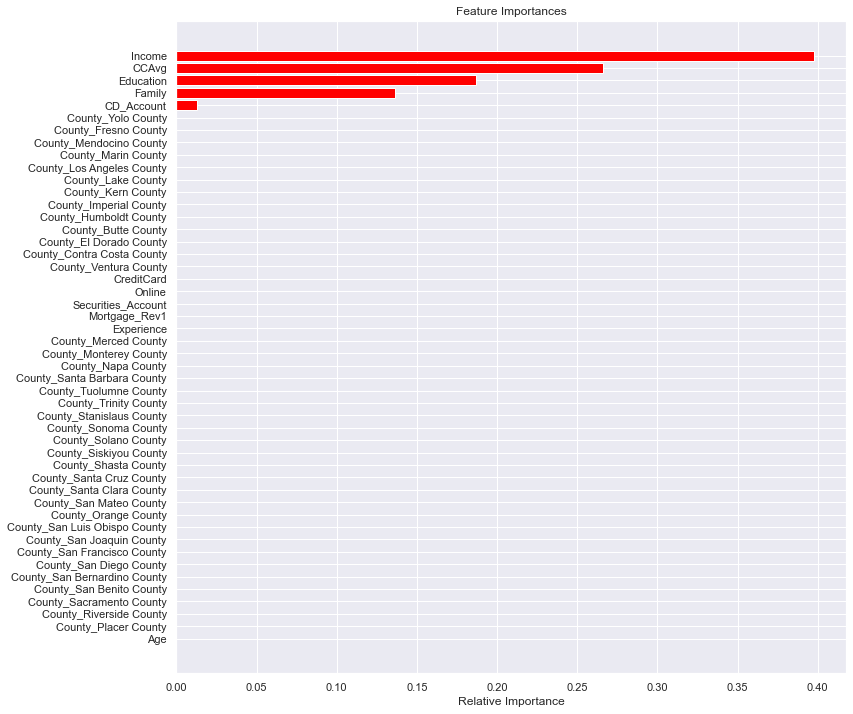

<IPython.core.display.Javascript object>

In [122]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Cost Complexity Pruning

In [123]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [124]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-5.694400e-15
1,7.577300e-19,-5.693643e-15
2,1.092023e-18,-5.692551e-15
3,1.515460e-18,-5.691035e-15
4,1.782894e-18,-5.689252e-15
5,1.782894e-18,-5.687469e-15
6,2.362335e-18,-5.685107e-15
7,2.674341e-18,-5.682433e-15
8,4.546380e-18,-5.677886e-15
9,7.621872e-18,-5.670264e-15


<IPython.core.display.Javascript object>

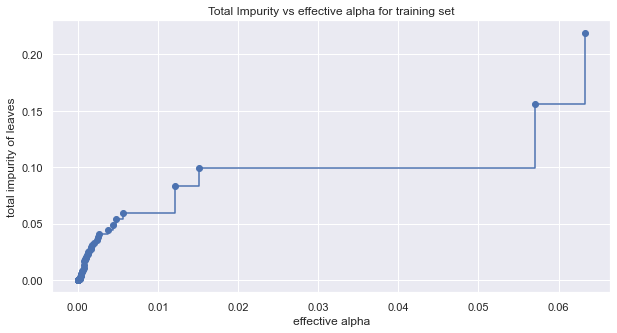

<IPython.core.display.Javascript object>

In [125]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [126]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.24685990165346883


<IPython.core.display.Javascript object>

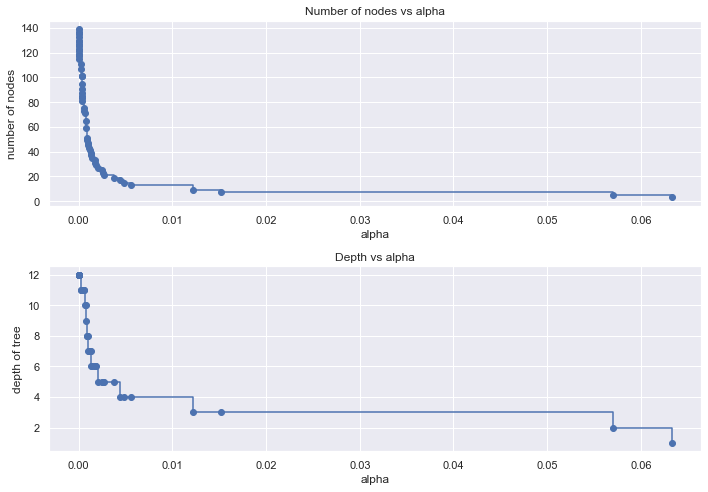

<IPython.core.display.Javascript object>

In [127]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [128]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [129]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [130]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

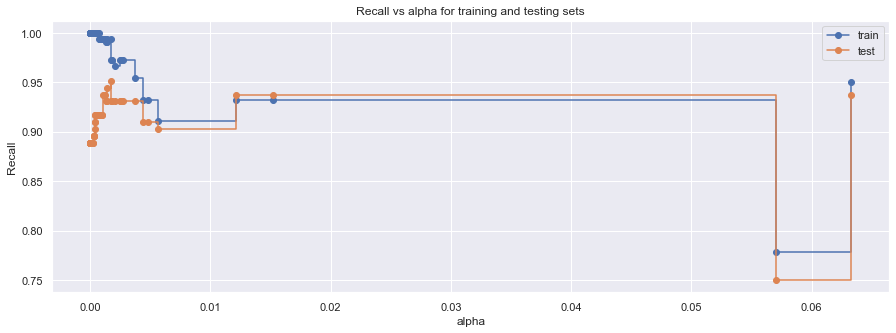

<IPython.core.display.Javascript object>

In [131]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [132]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.001700133343791723,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


<IPython.core.display.Javascript object>

In [133]:
best_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001700133343791723,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

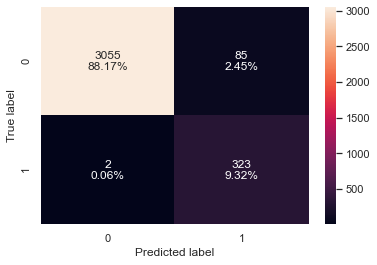

<IPython.core.display.Javascript object>

In [134]:
confusion_matrix_sklearn(best_model, x_train, y_train)

In [135]:
decision_tree_postpruned_perf_train = get_recall_score(best_model, x_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.9938461538461538


<IPython.core.display.Javascript object>

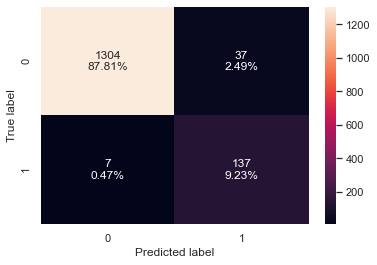

<IPython.core.display.Javascript object>

In [136]:
confusion_matrix_sklearn(best_model, x_test, y_test)

In [137]:
decision_tree_postpruned_perf_test = get_recall_score(best_model, x_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.9513888888888888


<IPython.core.display.Javascript object>

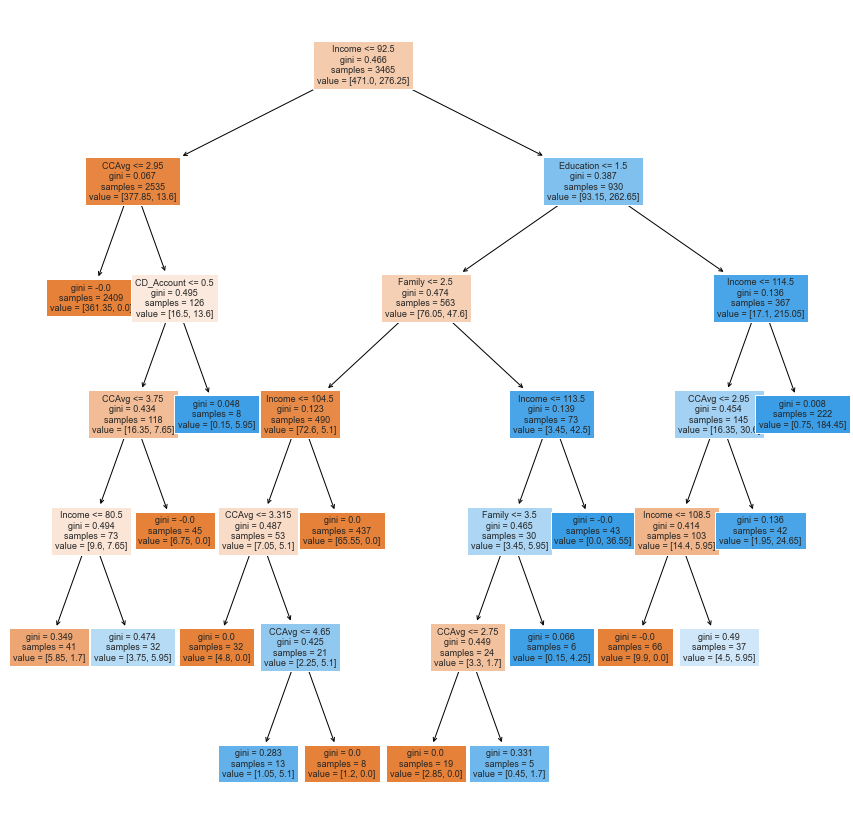

<IPython.core.display.Javascript object>

In [138]:
plt.figure(figsize=(15, 15))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [139]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [361.35, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.75
|   |   |   |   |--- Income <= 80.50
|   |   |   |   |   |--- weights: [5.85, 1.70] class: 0
|   |   |   |   |--- Income >  80.50
|   |   |   |   |   |--- weights: [3.75, 5.95] class: 1
|   |   |   |--- CCAvg >  3.75
|   |   |   |   |--- weights: [6.75, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.15, 5.95] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 104.50
|   |   |   |   |--- CCAvg <= 3.31
|   |   |   |   |   |--- weights: [4.80, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.31
|   |   |   |   |   |--- CCAvg <= 4.65
|   |   |   |   |   |   |--- weights: [1.05, 5.10] class: 1
|   |   |   |   |   |--- CCAvg >  4.65
|   |   |   |   |   |   |--- weights: [1.20, 0.00] class: 0
|   |   |   |--- Income >  104.50
|   |  

<IPython.core.display.Javascript object>

In [140]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Income                         0.621042
Education                      0.144298
Family                         0.135695
CCAvg                          0.086165
CD_Account                     0.012798
Age                            0.000000
County_Santa Clara County      0.000000
County_San Benito County       0.000000
County_San Bernardino County   0.000000
County_San Diego County        0.000000
County_San Francisco County    0.000000
County_San Joaquin County      0.000000
County_San Luis Obispo County  0.000000
County_San Mateo County        0.000000
County_Santa Barbara County    0.000000
County_Siskiyou County         0.000000
County_Santa Cruz County       0.000000
County_Shasta County           0.000000
County_Riverside County        0.000000
County_Solano County           0.000000
County_Sonoma County           0.000000
County_Stanislaus County       0.000000
County_Trinity County          0.000000
County_Tuolumne County         0.000000


<IPython.core.display.Javascript object>

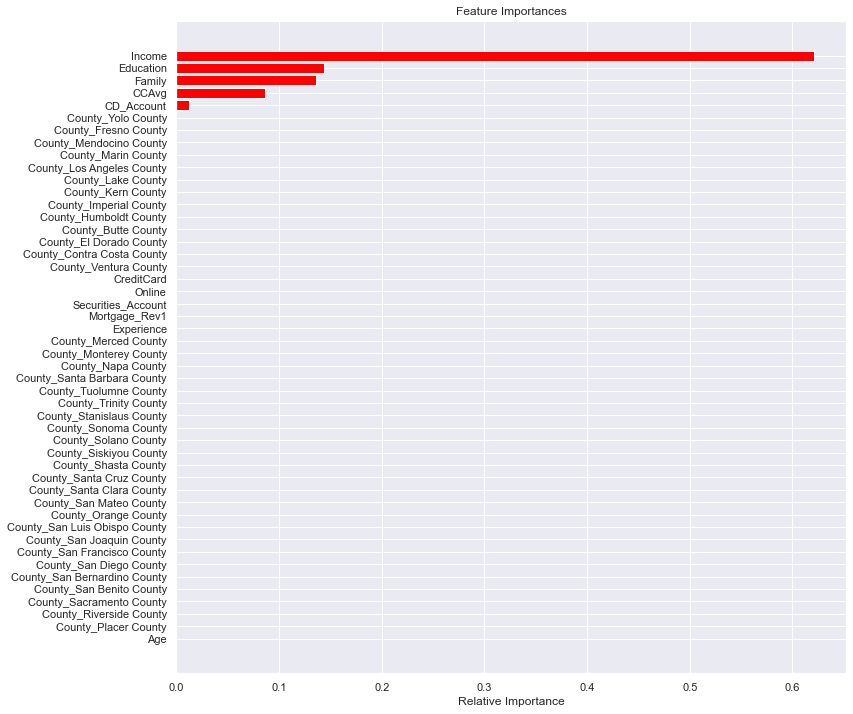

<IPython.core.display.Javascript object>

In [141]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [142]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,1.000000
1,0.963077
2,0.993846


<IPython.core.display.Javascript object>

In [143]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Recall on testing set
0,0.888889
1,0.972222
2,0.951389


<IPython.core.display.Javascript object>

## Decision Tree Analysis
### * I was able to create decision trees using Hyperparameter Tuning and Cost Complexity Tuning to get recall scores of .97 and .95 respectively. This reduces overfitting, and fosters decision making based on the tree. 
### * The model can be used to to predict which customers have a higher probability of taking out a personal loan if offered. 
### * The features of most importance are Income, Education, CCAvg, Family, and if they have a CD_Account.

# 9. Business Recommendations

### All of the models presented can aid in predicting which customers will buy a loan. 
### Using the Logistic Regression Model Marketing should look to focus on homeowners with a graduate degree, long term employment, a median income and at least three family members in the household. The customers most likely to buy the loan will already have a CD account with us and have moderate to high credit card expenitures. Geographically, the customers with the highest probability of buying the loan live in Marin, Orange, San Bernadino, and San Mateo counties. Given this profile a target group could be set up and another loan campaign could be set up.
### Using the Decision Tree Model You can further refine the customer profile to say customers with a monthly credit card average of less than or equal to 4,600 dollars, an income greater than 101,740 dollars, and living in a 3 person houshold would be a specific target group. Customers that spend more than 4,600 dollars in credit cards every month and that have a graduate degree or above would also be good candidates. 